In [1]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Arrays and matrices
from datetime import datetime # Manipulating dates and times

# Data visualization
import matplotlib.pyplot as plt # Combine pyplot with numpy into a single namespace
import matplotlib as mpl
import seaborn as sns

# Same random numbers (debug mode)
np.random.seed(238746)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/step1.csv', index_col=0, parse_dates=[0])
dataset

sku    pack    size   brand  price  exposed       promo    sales  \
date                                                                            
2016-12-10   144   MULTI  114.23  BRAND2   2.18     45.0  100.000000  51320.0   
2016-12-17   144   MULTI  114.23  BRAND2   2.00     45.0  100.000000  51320.0   
2016-12-24   144   MULTI  114.23  BRAND2   2.05     17.0  100.000000  66431.0   
2016-12-31   144   MULTI  114.23  BRAND2   3.00      2.0  100.000000  57001.0   
2017-01-07   144   MULTI  114.23  BRAND2   2.99      2.0   28.534193  15052.0   
...          ...     ...     ...     ...    ...      ...         ...      ...   
2019-05-25  2718  SINGLE  395.41  BRAND1   1.11      0.0   26.050480  33875.0   
2019-06-01  2718  SINGLE  395.41  BRAND1   1.30      1.0   43.099496  33328.0   
2019-06-08  2718  SINGLE  395.41  BRAND1   1.55      0.0    0.000000  22512.0   
2019-06-15  2718  SINGLE  395.41  BRAND1   1.55      0.0    0.000000  17461.0   
2019-06-22  2718  SINGLE  395.41  BRAND1   1.12      0.0    0.080094  17105.0   

            scope   target  
date                        
2016-12-10      1  51320.0  
2016-12-17      1  66431.0  
2016-12-24      1  57001.0  
2016-12-31      1  15052.0  
2017-01-07      1  22016.0  
...           ...      ...  
2019-05-25      0  33328.0  
2019-06-01      0  22512.0  
2019-06-08      0  17461.0  
2019-06-15      0  17105.0  
2019-06-22      0  35144.0  

[5719 rows x 10 columns]

# Inspection

The dataset has a total of **43 products**

In [3]:
len(dataset.groupby('sku').count())

43

**x133 weeks** (from **2016-12-10** to **2019-06-22**), each product (sku) has its own row for each of the 133 weeks

In [4]:
dataset.groupby(dataset.index).sum().sort_index()

sku      size  price  exposed        promo      sales  scope  \
date                                                                         
2016-12-10  77282  10560.02  48.74    229.0  1275.161249  1742926.0     12   
2016-12-17  77282  10560.02  48.13    229.0  1275.161249  1742926.0     12   
2016-12-24  77282  10560.02  48.16     58.0  1065.450731  1703097.0     12   
2016-12-31  77282  10560.02  50.69     30.0  1129.963537  1663252.0     12   
2017-01-07  77282  10560.02  51.98     31.0  1030.371199  1153687.0     12   
...           ...       ...    ...      ...          ...        ...    ...   
2019-05-25  77282  10560.02  49.07    144.0  1560.702053  2227132.0     12   
2019-06-01  77282  10560.02  50.45    167.0  1441.151598  2163742.0     12   
2019-06-08  77282  10560.02  55.91     65.0  1293.989967  2005445.0     12   
2019-06-15  77282  10560.02  55.86     33.0   828.483395  2050481.0     12   
2019-06-22  77282  10560.02  54.07     77.0   928.598161  2009027.0     12   

               target  
date                   
2016-12-10  1742926.0  
2016-12-17  1703097.0  
2016-12-24  1663252.0  
2016-12-31  1153687.0  
2017-01-07  1845493.0  
...               ...  
2019-05-25  2163742.0  
2019-06-01  2005445.0  
2019-06-08  2050481.0  
2019-06-15  2009027.0  
2019-06-22  1940456.0  

[133 rows x 8 columns]

The total amount of data is therefore **133 x 43 = 5719 rows**

# Outliers

We can notice that the sales are not similar or evenly spread in the dataset. The max value is 700k, while the 75% is only 50k, with a std of 100k. This means that some products sold way more than others, and therefore may be considered outliers in the dataset.

In [5]:
dataset.describe()

sku         size        price      exposed        promo  \
count  5719.000000  5719.000000  5719.000000  5719.000000  5719.000000   
mean   1797.255814   245.581860     1.190622     2.927959    31.314529   
std     784.923142   192.704161     0.697537     8.554256    36.543907   
min     144.000000    87.870000     0.300000     0.000000     0.000000   
25%    1065.000000   114.230000     0.560000     0.000000     0.981076   
50%    1618.000000   131.800000     1.080000     0.000000    18.461800   
75%    2682.000000   395.410000     1.610000     2.000000    43.302494   
max    2718.000000   878.680000     3.890000    70.000000   100.066205   

               sales        scope         target  
count    5719.000000  5719.000000    5719.000000  
mean    50800.074314     0.279070   50834.613569  
std     94395.388132     0.448581   94505.550714  
min       813.000000     0.000000     813.000000  
25%     12452.500000     0.000000   12463.000000  
50%     22091.000000     0.000000   22076.000000  
75%     46555.000000     1.000000   46555.000000  
max    714202.000000     1.000000  714202.000000

We identify 130 rows (2.23% of the whole dataset) which have sales above 400k.

In [6]:
outlier = dataset[dataset.sales > 400000]
outlier

sku    pack    size   brand  price  exposed     promo     sales  \
date                                                                           
2016-12-10  1608  SINGLE  439.34  BRAND3   0.95      0.0  1.386606  465626.0   
2016-12-17  1608  SINGLE  439.34  BRAND3   0.95      0.0  1.386606  465626.0   
2016-12-24  1608  SINGLE  439.34  BRAND3   0.94      0.0  0.765449  452218.0   
2016-12-31  1608  SINGLE  439.34  BRAND3   0.94      0.0  2.409030  483128.0   
2017-01-14  1608  SINGLE  439.34  BRAND3   0.95      1.0  4.685884  603169.0   
...          ...     ...     ...     ...    ...      ...       ...       ...   
2019-05-25  1608  SINGLE  439.34  BRAND3   0.91      1.0  2.684385  646107.0   
2019-06-01  1608  SINGLE  439.34  BRAND3   0.91      0.0  0.621293  624794.0   
2019-06-08  1608  SINGLE  439.34  BRAND3   0.91      0.0  0.152333  615361.0   
2019-06-15  1608  SINGLE  439.34  BRAND3   0.91      0.0  0.289041  629391.0   
2019-06-22  1608  SINGLE  439.34  BRAND3   0.91      0.0  0.000000  587662.0   

            scope    target  
date                         
2016-12-10      0  465626.0  
2016-12-17      0  452218.0  
2016-12-24      0  483128.0  
2016-12-31      0  365363.0  
2017-01-14      0  656344.0  
...           ...       ...  
2019-05-25      0  624794.0  
2019-06-01      0  615361.0  
2019-06-08      0  629391.0  
2019-06-15      0  587662.0  
2019-06-22      0  589596.0  

[130 rows x 10 columns]

As we can see, **the only product which has sales above 400k is sku=1608, brand=BRAND3**. We can infer that this specific product is sold in huge amounts, based on the fact that it generally has also a low price, it is generally never exposed and never in promo.

In [7]:
outlier.sku.unique()

array([1608], dtype=int64)

In [8]:
sku_outlier = dataset[dataset.sku == 1608]
sku_outlier.describe()

sku          size       price     exposed       promo  \
count   133.0  1.330000e+02  133.000000  133.000000  133.000000   
mean   1608.0  4.393400e+02    0.909474    0.496241    4.794646   
std       0.0  1.426458e-12    0.034407    2.457592   15.735340   
min    1608.0  4.393400e+02    0.860000    0.000000    0.000000   
25%    1608.0  4.393400e+02    0.880000    0.000000    0.171666   
50%    1608.0  4.393400e+02    0.890000    0.000000    0.458908   
75%    1608.0  4.393400e+02    0.950000    0.000000    1.692686   
max    1608.0  4.393400e+02    0.970000   21.000000   82.517309   

               sales  scope         target  
count     133.000000  133.0     133.000000  
mean   593313.120301    0.0  594245.225564  
std     64602.368980    0.0   63633.168969  
min    343469.000000    0.0  343469.000000  
25%    564943.000000    0.0  567216.000000  
50%    606417.000000    0.0  606417.000000  
75%    628214.000000    0.0  628214.000000  
max    714202.000000    0.0  714202.000000

## SKU 1608 Analysis
We analyze the outlier SKU=1608. We check if there exist some parameter or trend that justifies the high number of sales, in order to use this information to predict the sales of other products.

We plot the amount of sales, the volume in promo, the exposed, and the price features to inspect any significant trend.

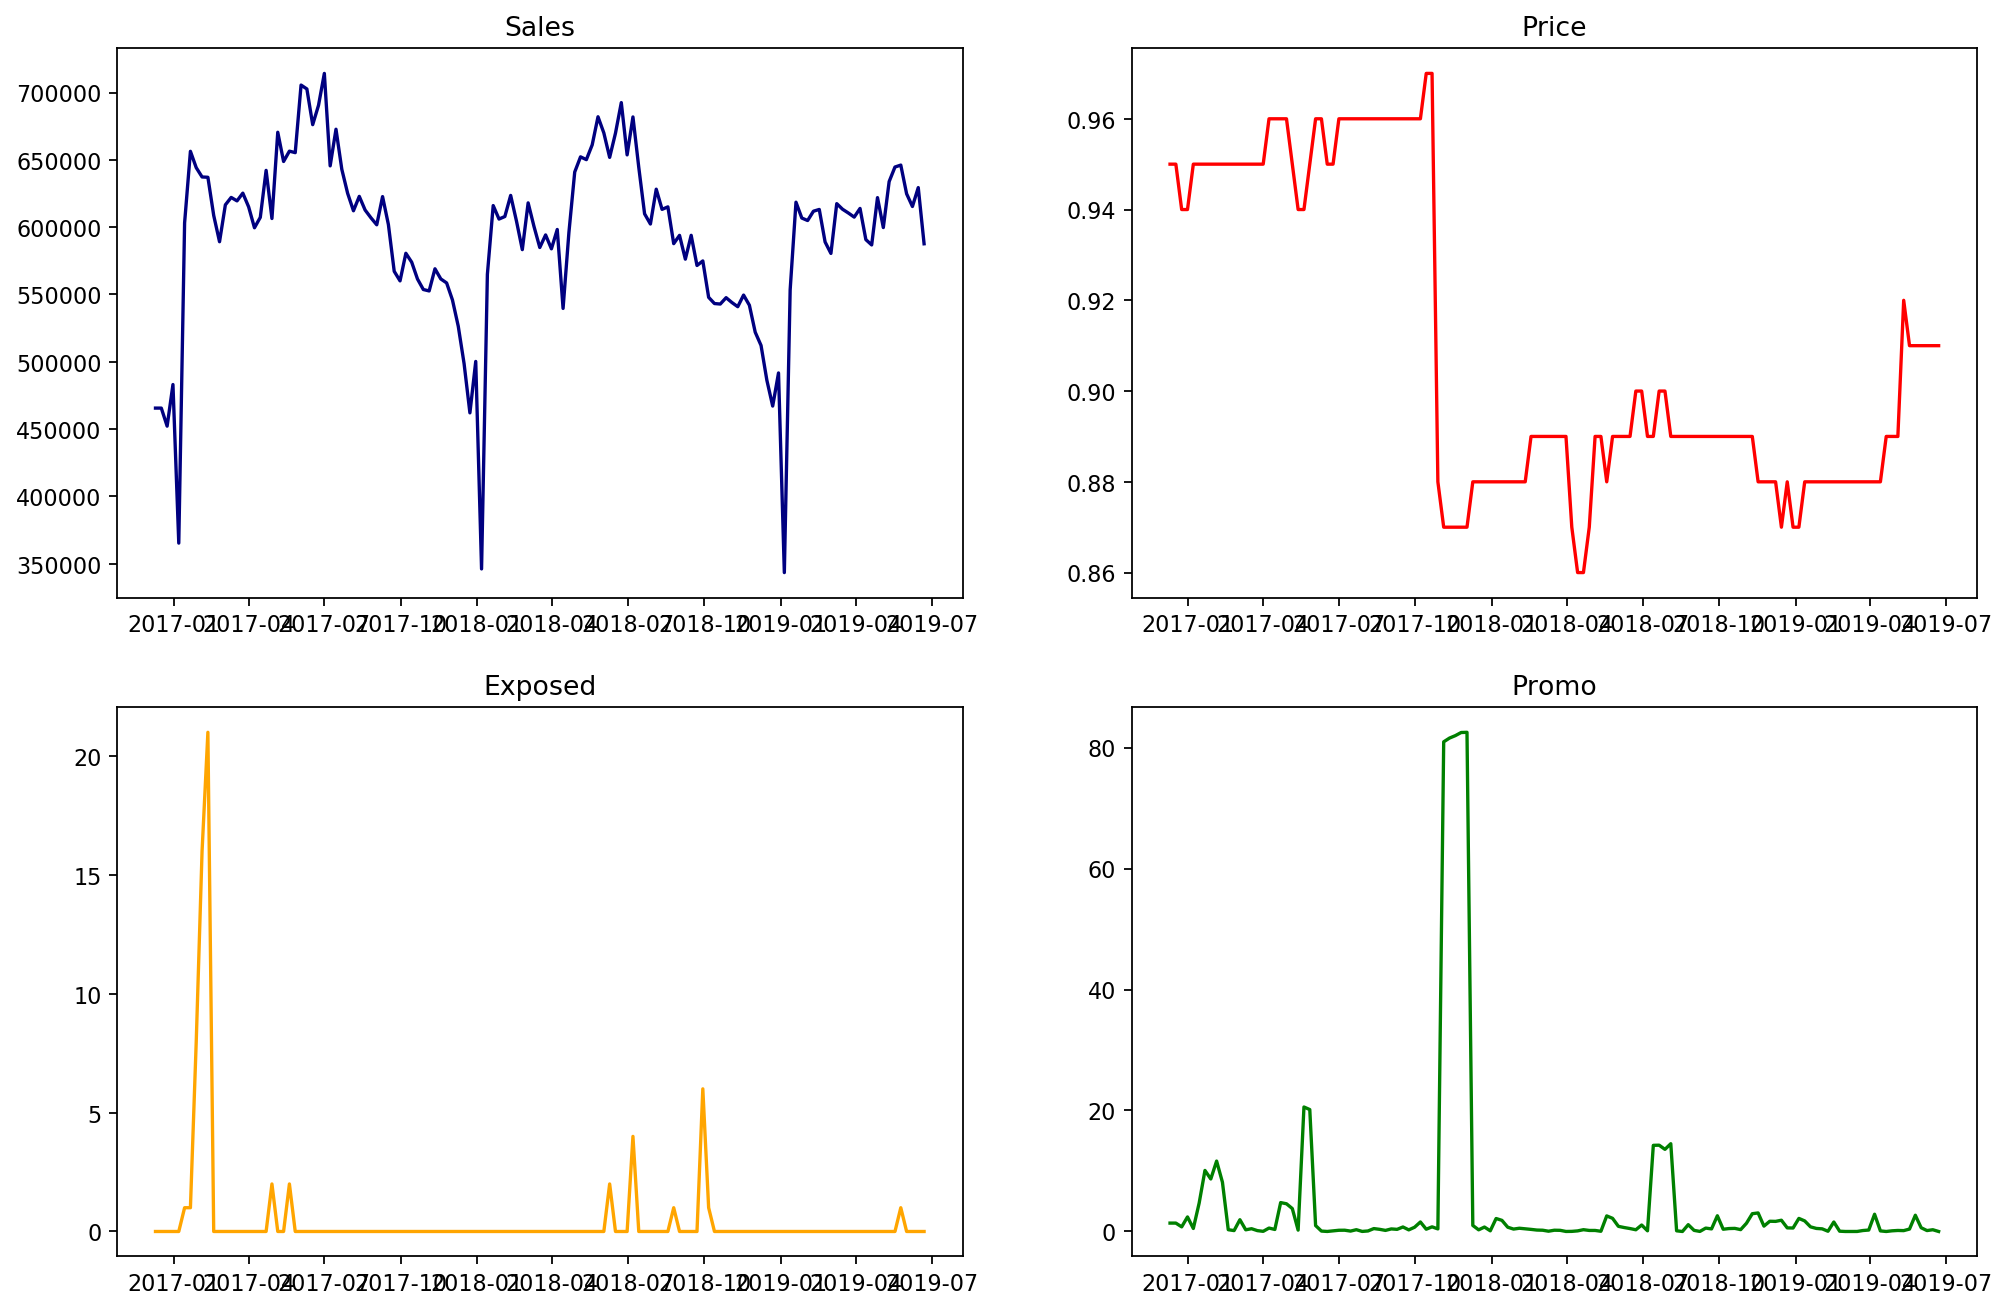

In [9]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plt.title("Sales")
plt.plot(sku_outlier.sales, color="navy")

plt.subplot(2, 2, 2)
plt.title("Price")
plt.plot(sku_outlier.price, color="red")

plt.subplot(2, 2, 3)
plt.title("Exposed")
plt.plot(sku_outlier.exposed, color="orange")

plt.subplot(2, 2, 4)
plt.title("Promo")
plt.plot(sku_outlier.promo, color="green")

In [10]:
sku_outlier_nums = sku_outlier[['sales', 'price', 'promo', 'exposed']]
sku_outlier_norm = (sku_outlier_nums -sku_outlier_nums.mean()) / sku_outlier_nums.std()
sku_outlier_norm

sales     price     promo   exposed
date                                              
2016-12-10 -1.976508  1.177866 -0.216585 -0.201921
2016-12-17 -1.976508  1.177866 -0.216585 -0.201921
2016-12-24 -2.184055  0.887224 -0.256060 -0.201921
2016-12-31 -1.705589  0.887224 -0.151609 -0.201921
2017-01-07 -3.528510  1.177866 -0.272955 -0.201921
...              ...       ...       ...       ...
2019-05-25  0.817213  0.015297 -0.134110  0.204981
2019-06-01  0.487302  0.015297 -0.265222 -0.201921
2019-06-08  0.341286  0.015297 -0.295025 -0.201921
2019-06-15  0.558461  0.015297 -0.286337 -0.201921
2019-06-22 -0.087475  0.015297 -0.304706 -0.201921

[133 rows x 4 columns]

We also try to plot those 4 features in relation to each other, to understand if there is any correlation between them.

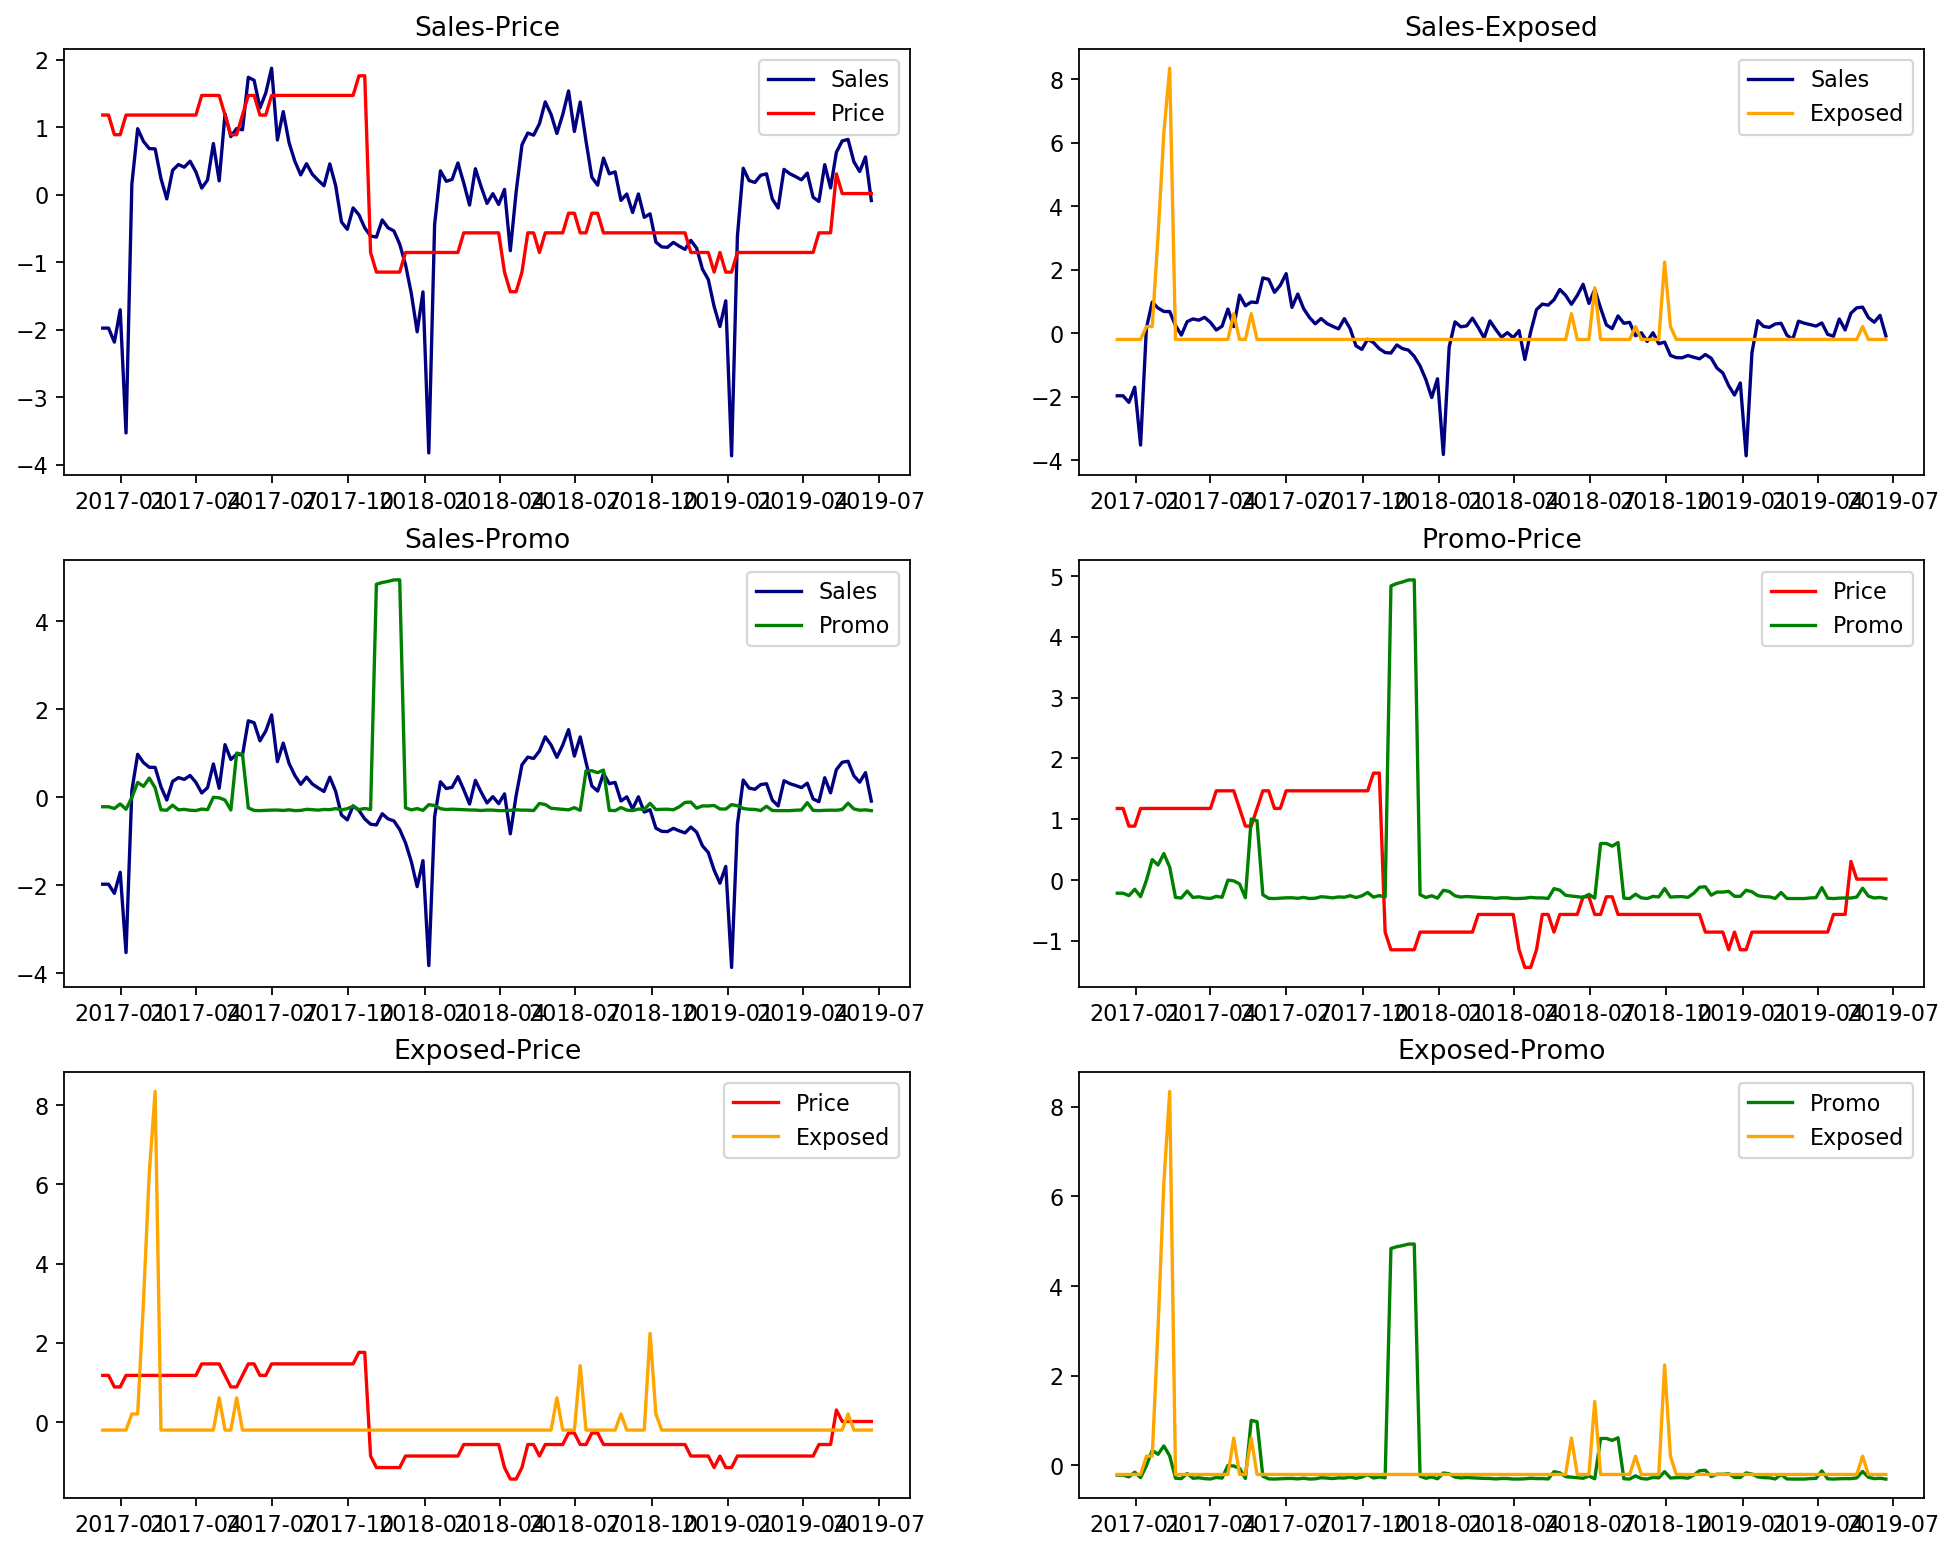

In [11]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 2, 1)
plt.title("Sales-Price")
plt.plot(sku_outlier_norm.sales, color="navy", label="Sales")
plt.plot(sku_outlier_norm.price, color="red", label="Price")
plt.legend()

plt.subplot(3, 2, 2)
plt.title("Sales-Exposed")
plt.plot(sku_outlier_norm.sales, color="navy", label="Sales")
plt.plot(sku_outlier_norm.exposed, color="orange", label="Exposed")
plt.legend()

plt.subplot(3, 2, 3)
plt.title("Sales-Promo")
plt.plot(sku_outlier_norm.sales, color="navy", label="Sales")
plt.plot(sku_outlier_norm.promo, color="green", label="Promo")
plt.legend()

plt.subplot(3, 2, 4)
plt.title("Promo-Price")
plt.plot(sku_outlier_norm.price, color="red", label="Price")
plt.plot(sku_outlier_norm.promo, color="green", label="Promo")
plt.legend()

plt.subplot(3, 2, 5)
plt.title("Exposed-Price")
plt.plot(sku_outlier_norm.price, color="red", label="Price")
plt.plot(sku_outlier_norm.exposed, color="orange", label="Exposed")
plt.legend()

plt.subplot(3, 2, 6)
plt.title("Exposed-Promo")
plt.plot(sku_outlier_norm.promo, color="green", label="Promo")
plt.plot(sku_outlier_norm.exposed, color="orange", label="Exposed")
plt.legend()

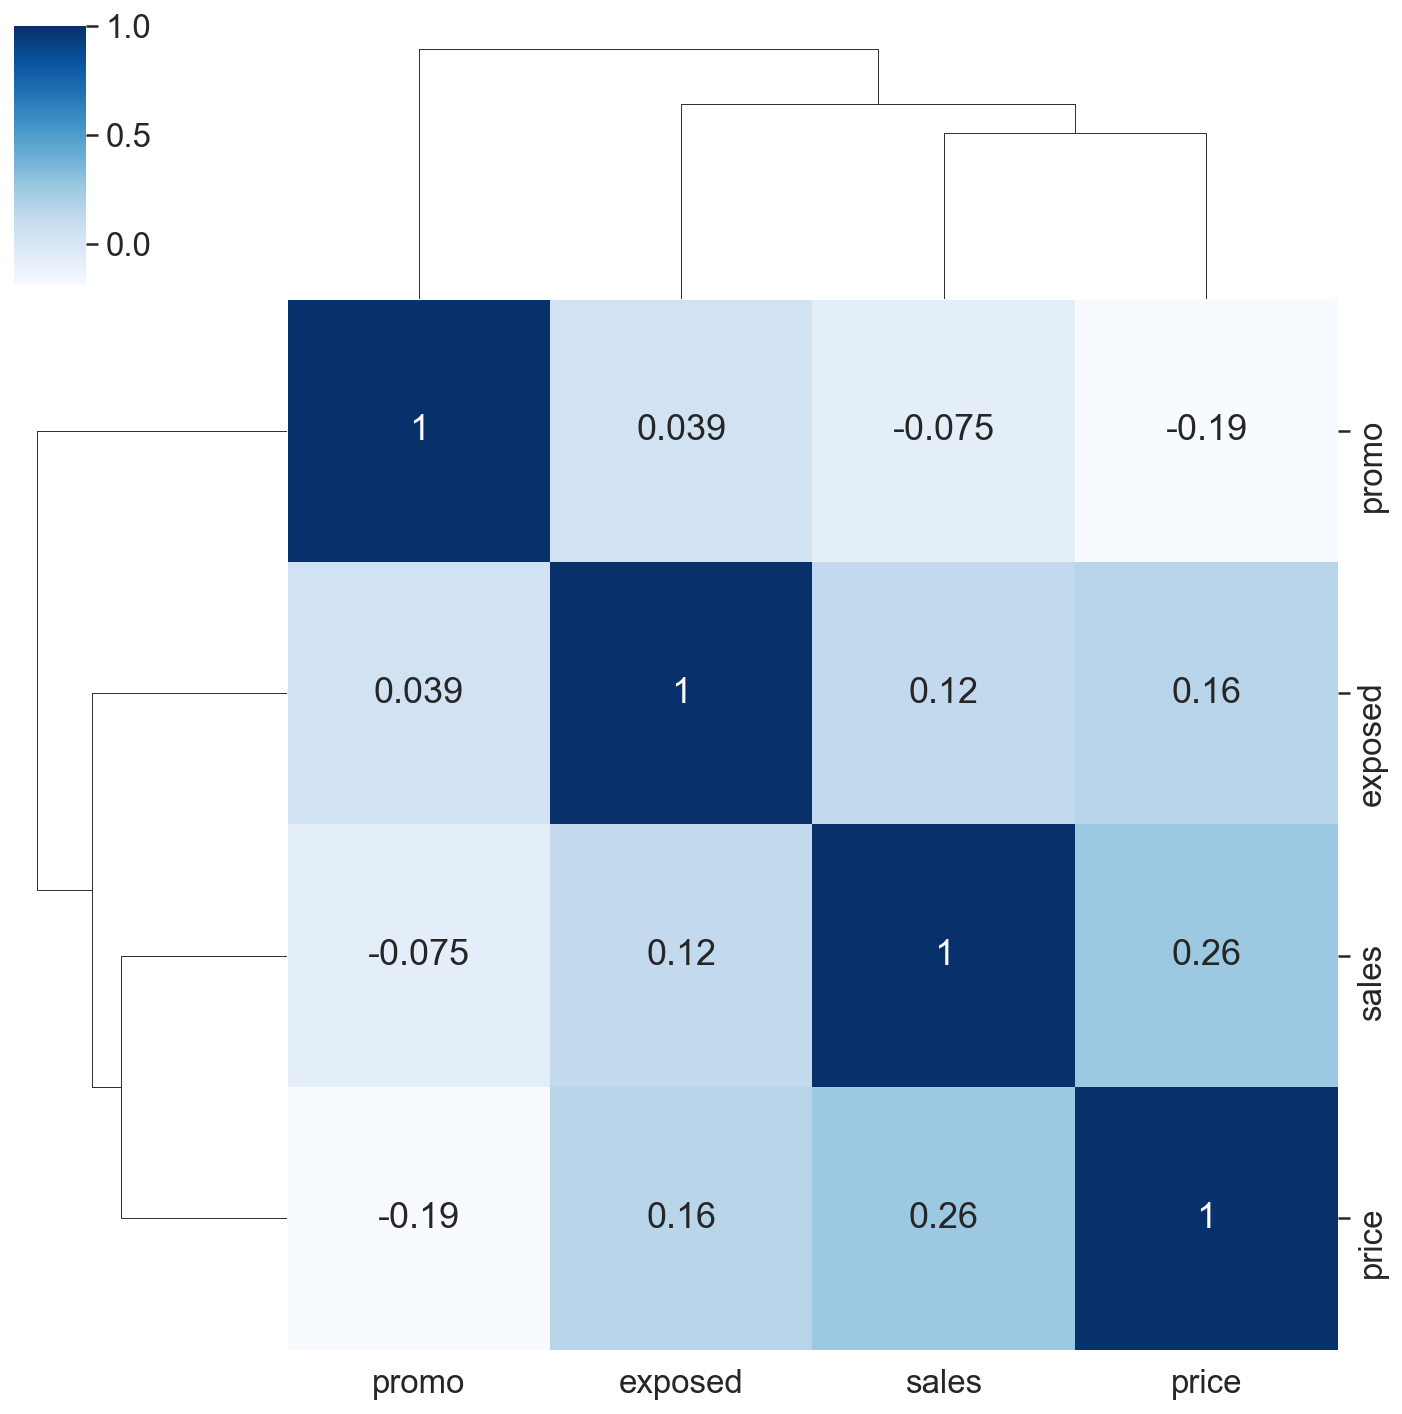

In [12]:
correlations = sku_outlier_nums.corr()
sns.set(font_scale=1.5)
sns.clustermap(correlations, cmap="Blues", annot=True)

No significant insight can be found from the analysis of the product.

## Brand3 Analysis
We now try to inspect the brand of the outlier product (BRAND3).

In [13]:
df_brand3 = dataset[dataset.brand == "BRAND3"]
df_brand3.describe()

sku         size        price      exposed        promo  \
count  1596.000000  1596.000000  1596.000000  1596.000000  1596.000000   
mean   1535.666667   252.621667     0.944774     0.073935     5.506394   
std     116.226874   228.447486     0.350697     0.777939    16.400419   
min    1356.000000    87.870000     0.480000     0.000000     0.000000   
25%    1446.750000    87.870000     0.537500     0.000000     0.000000   
50%    1577.000000   131.800000     0.990000     0.000000     0.750785   
75%    1610.500000   395.410000     1.250000     0.000000     3.540647   
max    1732.000000   878.680000     1.750000    21.000000   100.000000   

               sales   scope         target  
count    1596.000000  1596.0    1596.000000  
mean    76821.538847     0.0   76957.342732  
std    158590.298563     0.0  158795.958564  
min      3668.000000     0.0    3668.000000  
25%     14527.250000     0.0   14533.250000  
50%     23225.500000     0.0   23294.500000  
75%     43610.000000     0.0   43719.250000  
max    714202.000000     0.0  714202.000000

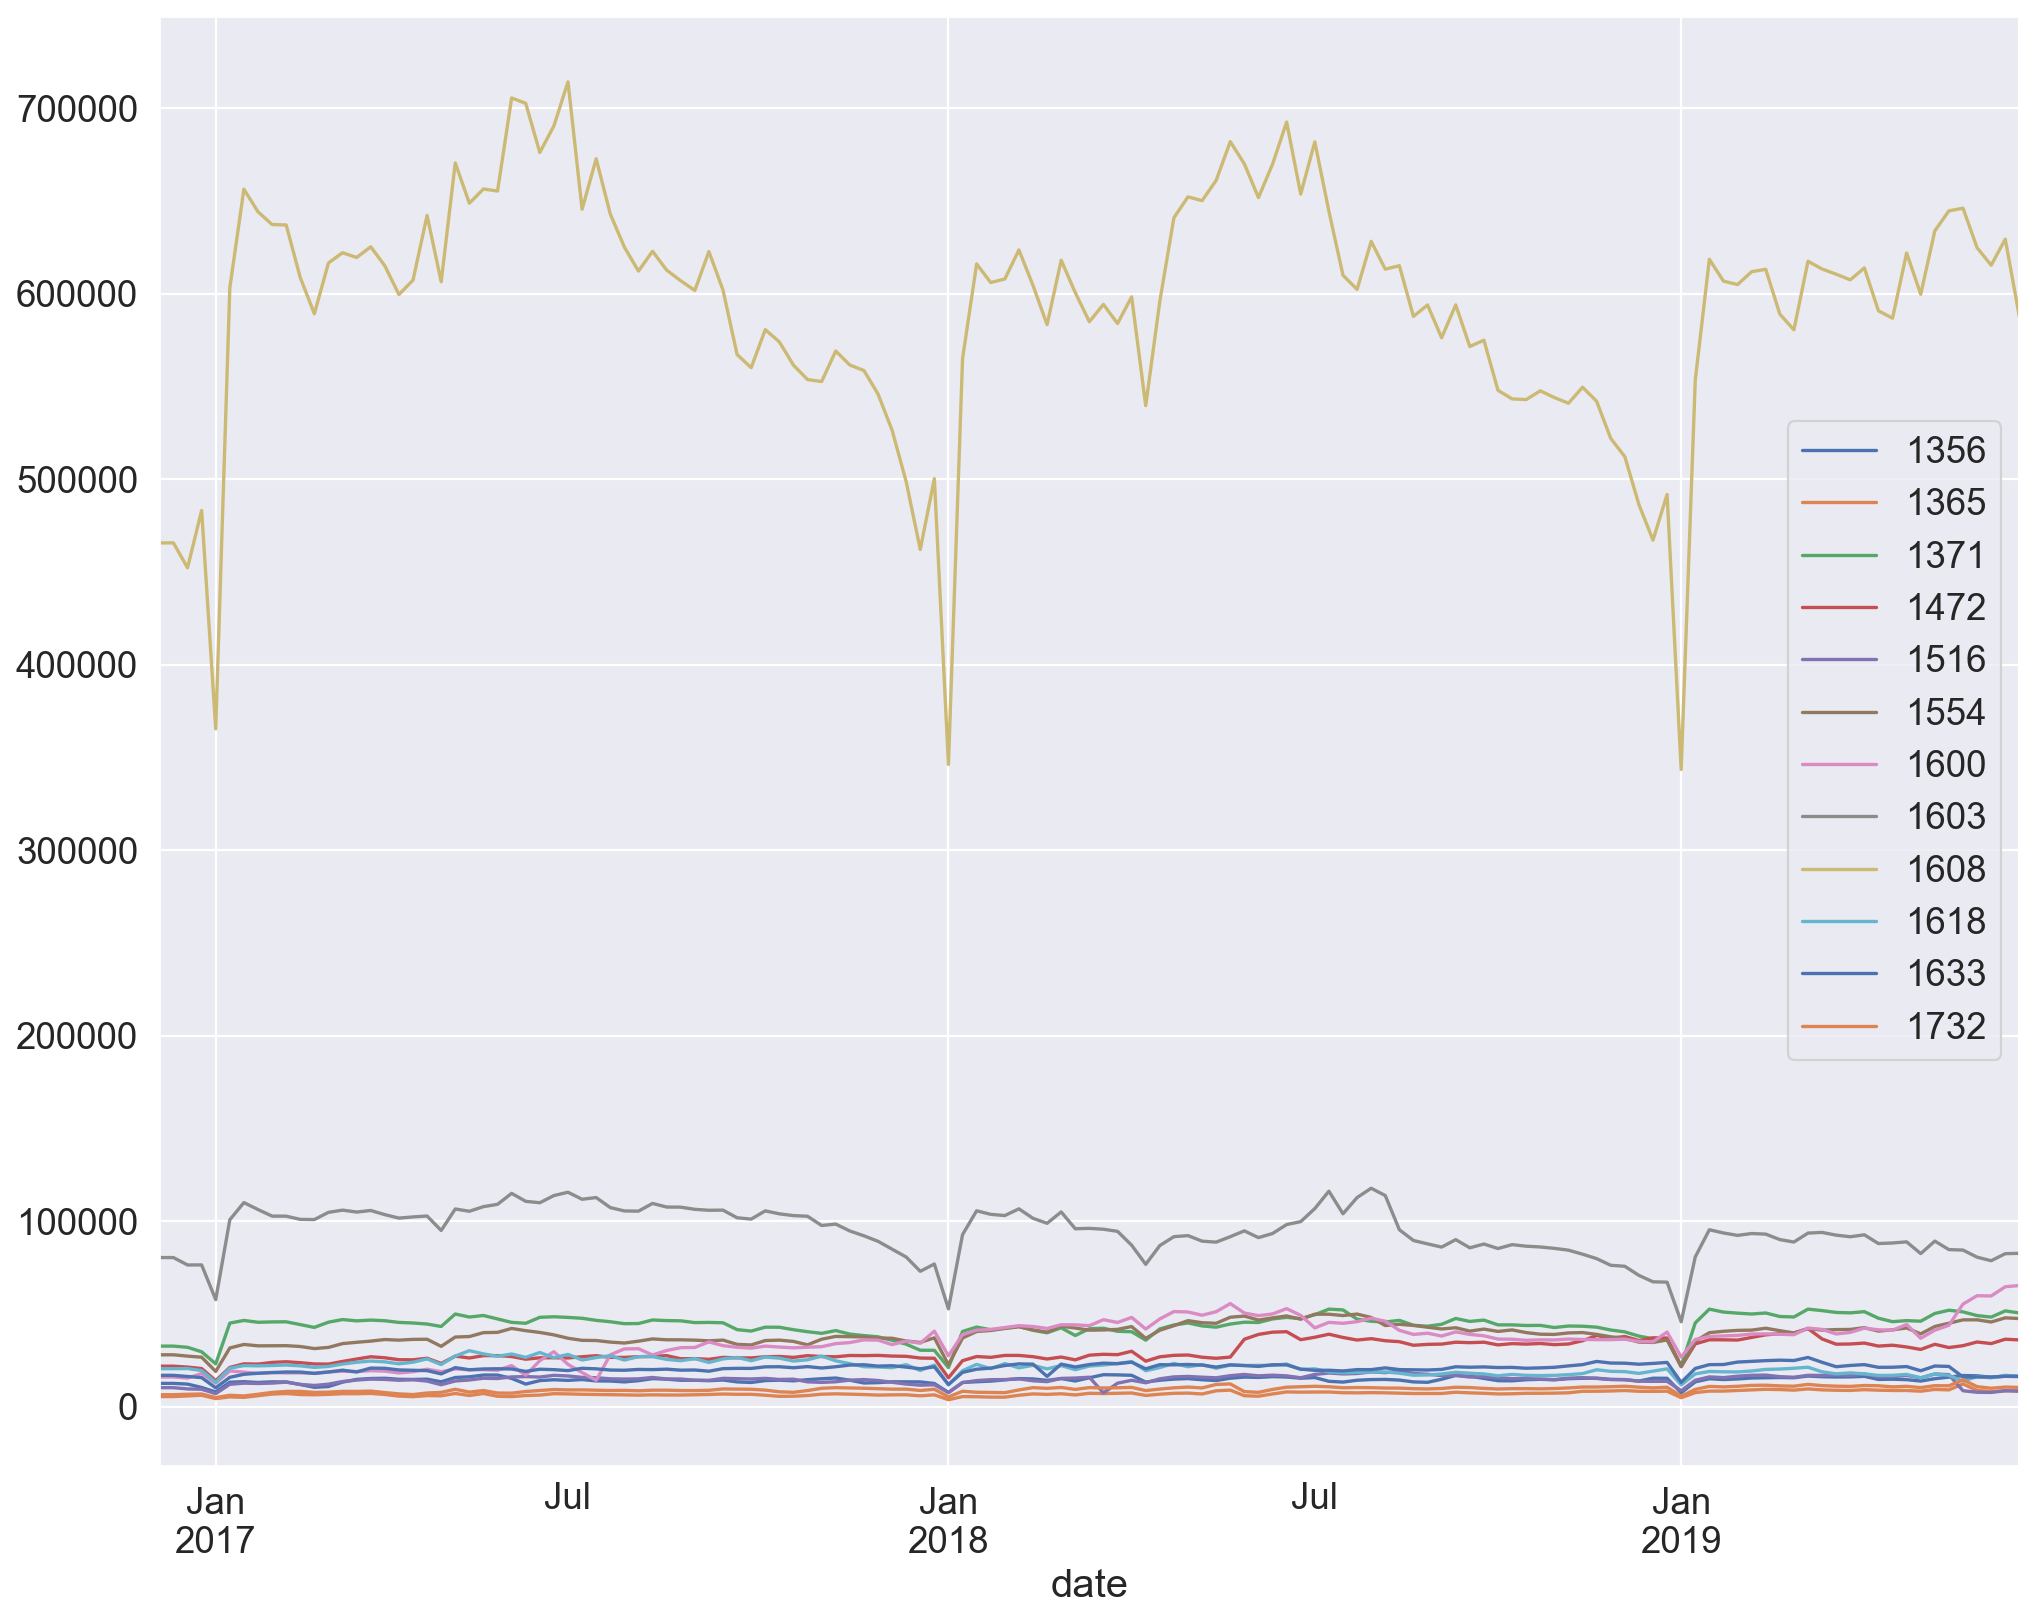

In [14]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
df_brand3.groupby('sku').sales.plot()
plt.legend()

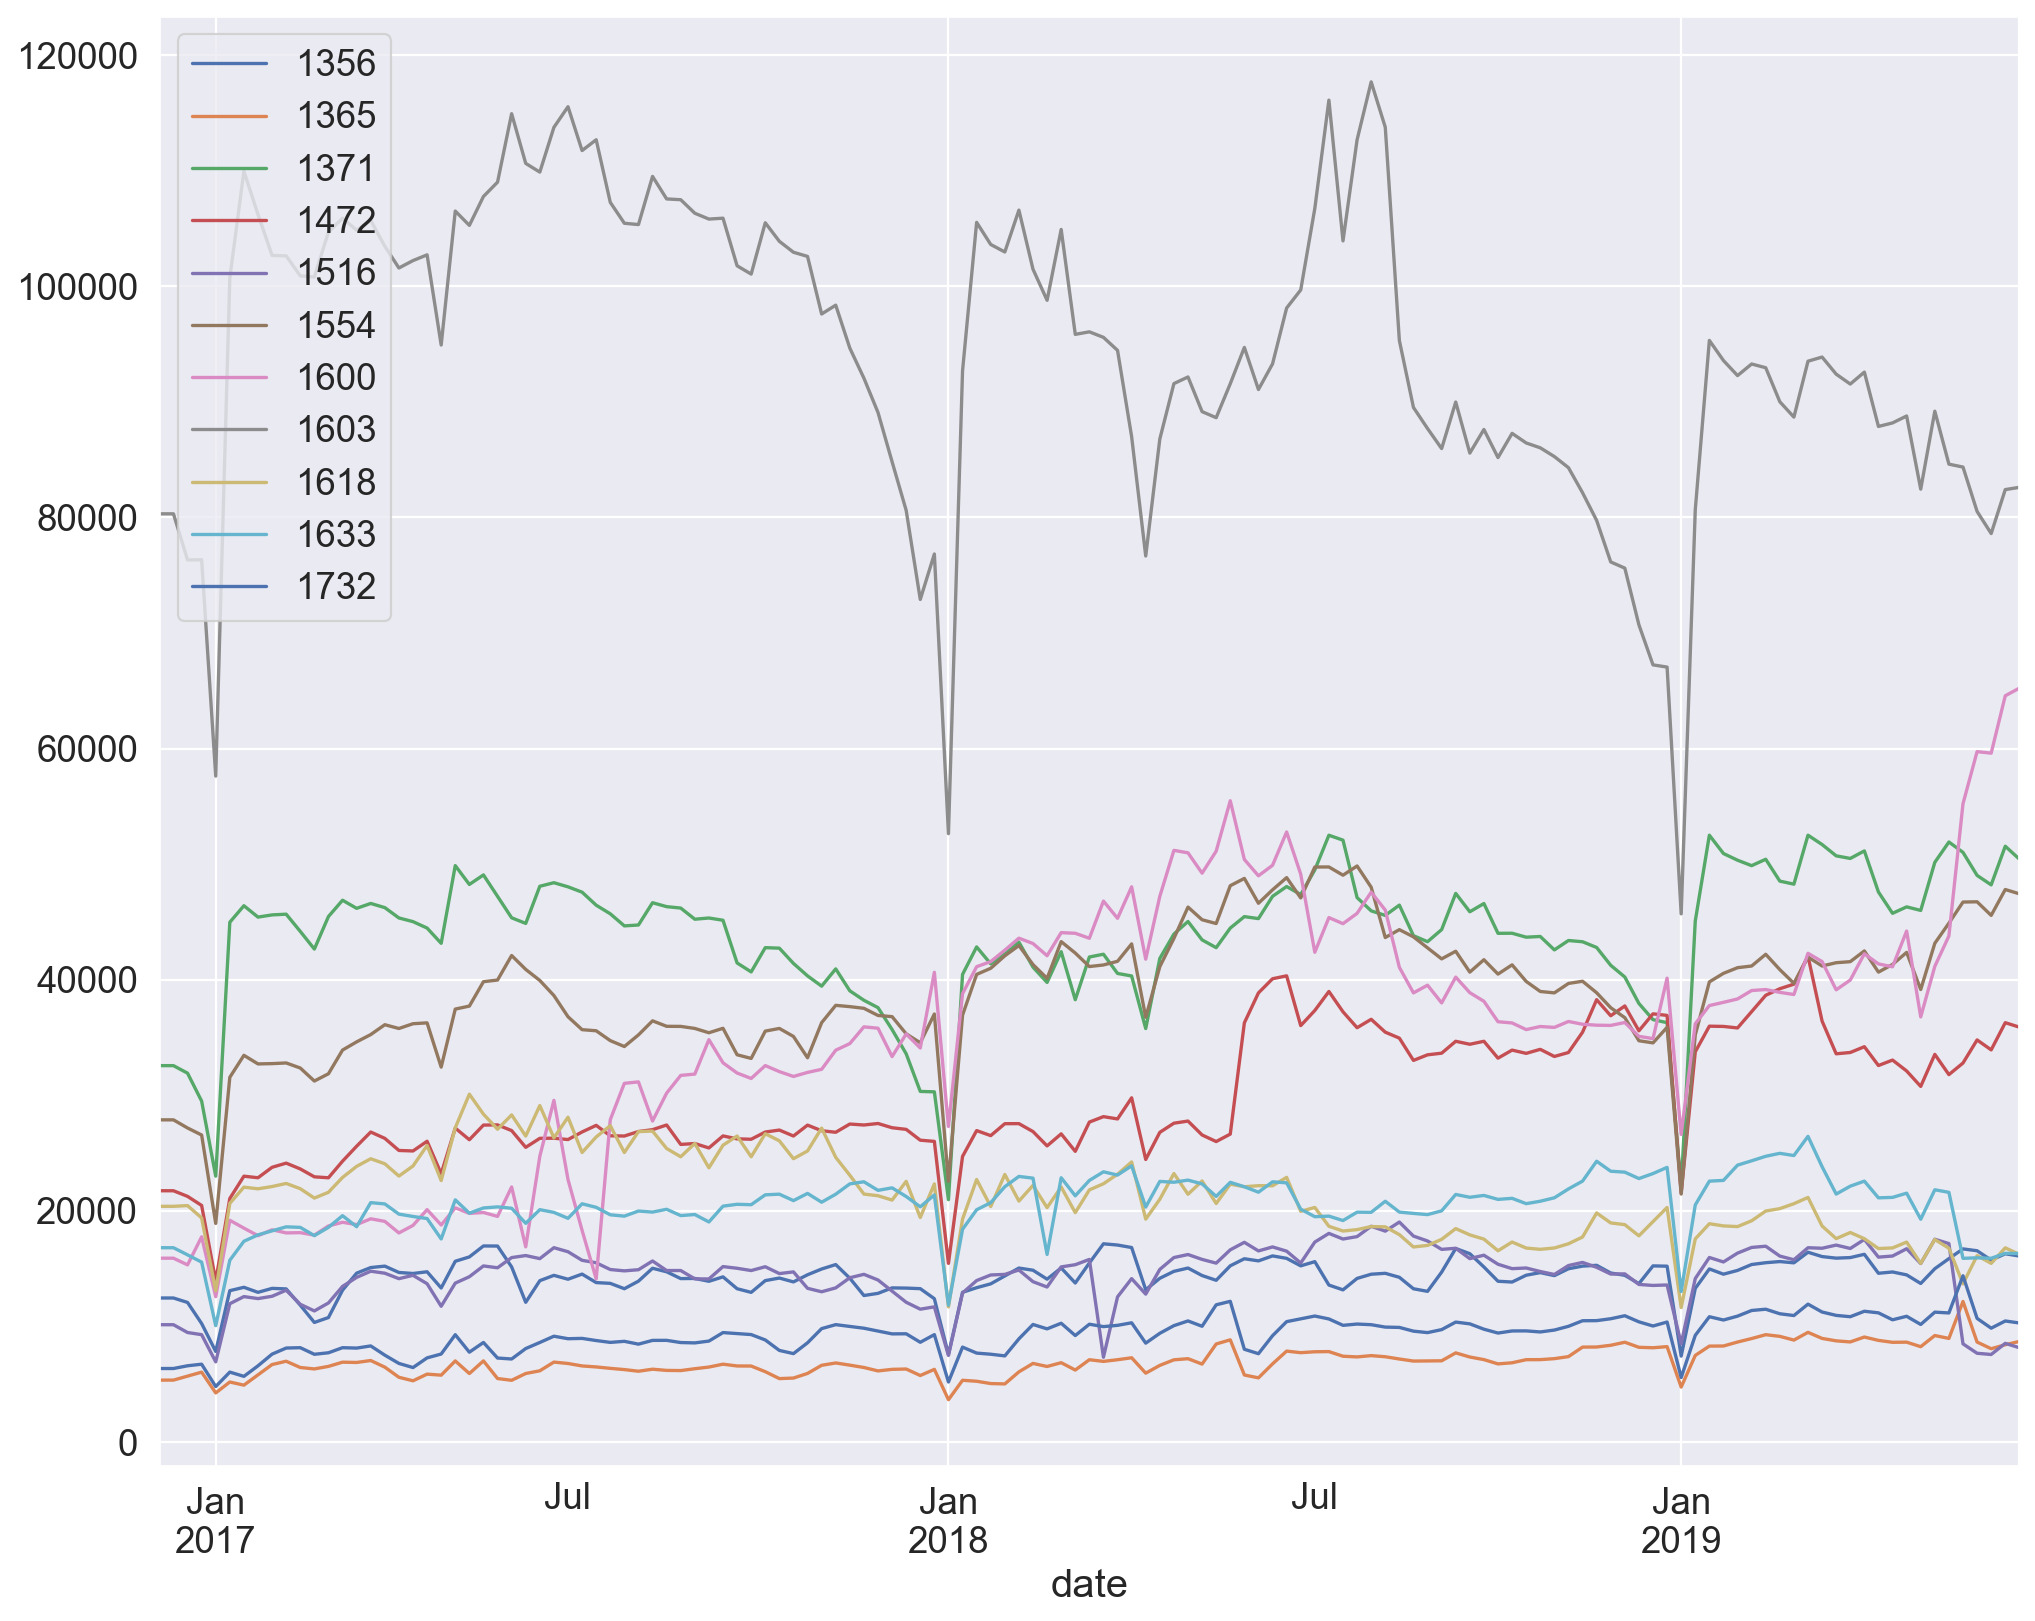

In [15]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
df_brand3[df_brand3.sku != 1608].groupby('sku').sales.plot()
plt.legend()

The products seem to have a similar sales trend in time. It is possible to find some similarity between different products in terms of sales. We therefore try to cluster together sales of different products using **KMeans**.

# Clustering

In [16]:
no1608 = dataset[dataset.sku != 1608]
mean_group = no1608.groupby('sku').mean().sort_values(by='sales').sales
std_group = no1608.groupby('sku').std().sort_values(by='sales').sales
max_group = no1608.groupby('sku').max().sort_values(by='sales').sales
mean_std_df = pd.DataFrame(data={'mean': mean_group, 'std': std_group, 'max': max_group})
mean_std_df.head()

mean           std       max
sku                                       
144   42966.601504  28665.307653  127418.0
546  111870.263158  53567.115697  266919.0
549   64258.593985  40533.346384  179886.0
554  171553.661654  75667.928155  392180.0
686   48189.090226  32651.004976  146671.0

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=200)
km.fit(mean_std_df.reset_index(drop=True))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=200, tol=0.0001, verbose=0)

In [18]:
mean_std_km = mean_std_df
mean_std_km['label'] = km.labels_
mean_std_km.head()

mean           std       max  label
sku                                              
144   42966.601504  28665.307653  127418.0      1
546  111870.263158  53567.115697  266919.0      2
549   64258.593985  40533.346384  179886.0      1
554  171553.661654  75667.928155  392180.0      2
686   48189.090226  32651.004976  146671.0      1

Based on the mean, std, and max value of sales per product, we inspect 3 clusters for similarities.

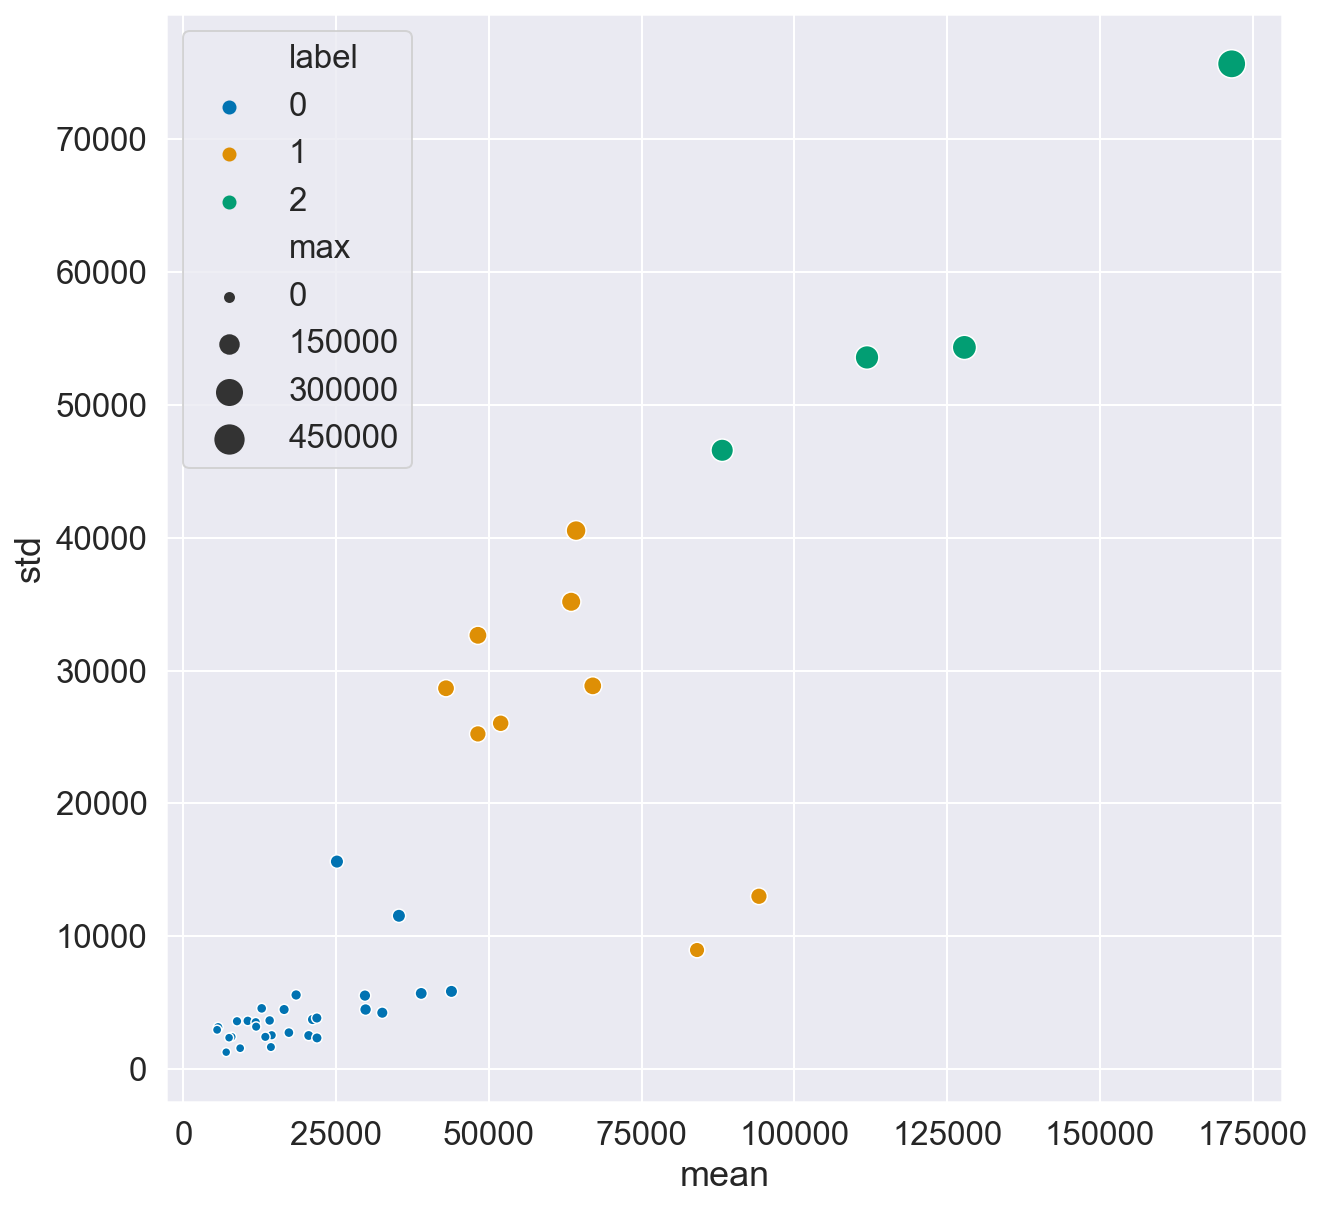

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(ax=ax, x="mean", y="std", size="max", sizes=(20, 200), hue="label", palette="colorblind", data=mean_std_df)

In [20]:
batch1 = dataset[dataset.sku.isin(mean_std_df[mean_std_df.label == 0].index)]
batch2 = dataset[dataset.sku.isin(mean_std_df[mean_std_df.label == 1].index)]
batch3 = dataset[dataset.sku.isin(mean_std_df[mean_std_df.label == 2].index)]
print("Batch1 size: {}".format(len(batch1)))
print("Batch2 size: {}".format(len(batch2)))
print("Batch3 size: {}".format(len(batch3)))
print("Total size: {}".format(len(batch1) + len(batch2) + len(batch3)))

print("In scope batch1: {}".format(len(batch1[batch1.scope == 1]) / 133))
print("In scope batch2: {}".format(len(batch2[batch2.scope == 1]) / 133))
print("In scope batch3: {}".format(len(batch3[batch3.scope == 1]) / 133))

Batch1 size: 3857
Batch2 size: 1197
Batch3 size: 532
Total size: 5586
In scope batch1: 1.0
In scope batch2: 7.0
In scope batch3: 4.0


sku
546     AxesSubplot(0.125,0.125;0.775x0.16413)
554     AxesSubplot(0.125,0.125;0.775x0.16413)
1027    AxesSubplot(0.125,0.125;0.775x0.16413)
1065    AxesSubplot(0.125,0.125;0.775x0.16413)
Name: sales, dtype: object

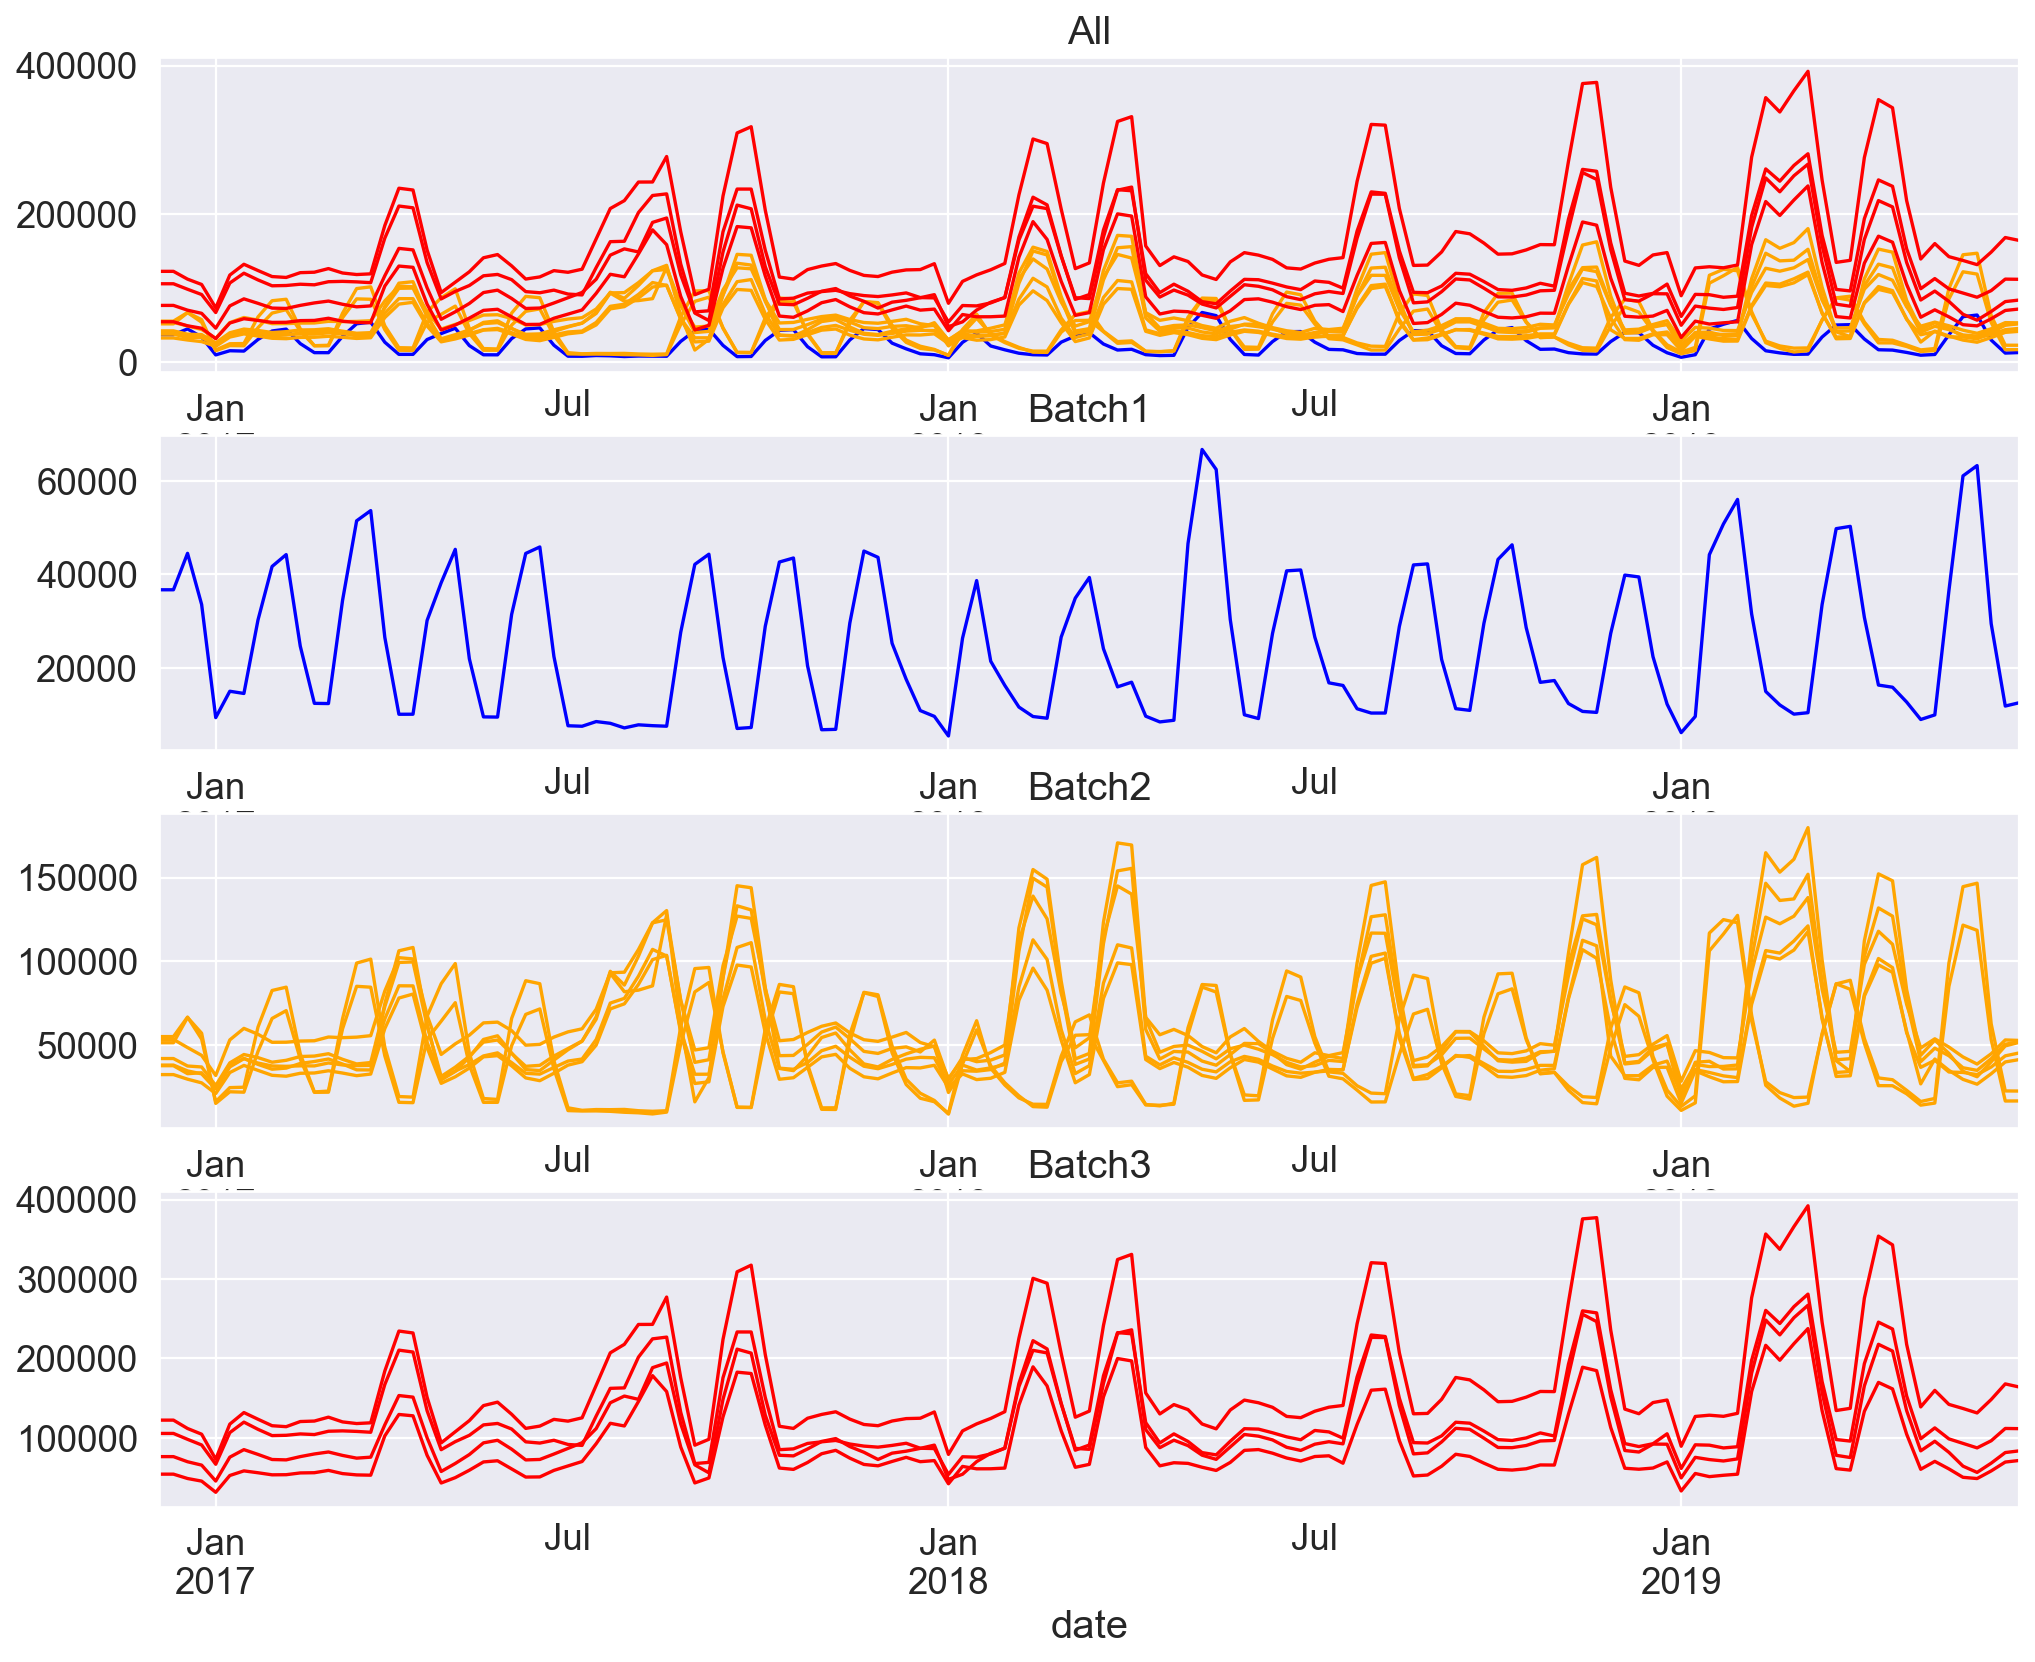

In [21]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(4, 1, 1)
plt.title("All")
batch1[batch1.scope == 1].groupby('sku').sales.plot(color="blue")
batch2[batch2.scope == 1].groupby('sku').sales.plot(color="orange")
batch3[batch3.scope == 1].groupby('sku').sales.plot(color="red")

plt.subplot(4, 1, 2)
plt.title("Batch1")
batch1[batch1.scope == 1].groupby('sku').sales.plot(color="blue")

plt.subplot(4, 1, 3)
plt.title("Batch2")
batch2[batch2.scope == 1].groupby('sku').sales.plot(color="orange")

plt.subplot(4, 1, 4)
plt.title("Batch3")
batch3[batch3.scope == 1].groupby('sku').sales.plot(color="red")

# Sales Clustering
The previous clustering procedure did not gave us any major insight. However, we can see that some products have indeed similar sales. Therefore, we use this information to try to perform another round of clustering using the values of sales directly.

In [22]:
grp = pd.DataFrame({
    'mean_sales': dataset.groupby('sku').sales.mean(),
    'std_sales': dataset.groupby('sku').sales.std()
})
grp

mean_sales     std_sales
sku                              
144    42966.601504  28665.307653
546   111870.263158  53567.115697
549    64258.593985  40533.346384
554   171553.661654  75667.928155
686    48189.090226  32651.004976
688    51914.578947  26028.643922
1027   88174.533835  46578.028214
1035   63453.827068  35175.303001
1051   25117.157895  15618.394707
1058   48185.977444  25228.391515
1065  127813.375940  54322.252466
1206   66985.556391  28844.970295
1356   14309.872180   1658.001213
1365    6993.015038   1271.256513
1371   43856.842105   5847.257286
1472   29698.541353   5531.451717
1516   14433.917293   2548.314262
1554   38908.992481   5695.225421
1600   35261.353383  11537.764868
1603   94182.849624  13006.518760
1608  593313.120301  64602.368980
1618   21129.691729   3732.292910
1633   20493.616541   2526.967043
1732    9276.654135   1571.797634
2249    7893.706767   2428.134434
2360    5673.421053   3151.019117
2365    8760.977444   3601.539598
2396   10515.496241   3629.160704
2401   18434.977444   5578.115946
2410    7463.744361   2361.239876
2678   14101.593985   3657.860163
2681    5506.804511   2954.227001
2682   11825.488722   3529.567245
2683   11892.481203   3191.541490
2689   16470.090226   4483.355605
2696   17252.263158   2742.616785
2698   12800.879699   4569.438633
2704   21851.323308   2343.399093
2705   84052.360902   8960.476335
2707   32538.360902   4241.923037
2711   13395.932331   2425.002897
2712   21827.383459   3842.640853
2718   29804.225564   4482.342219

In [23]:
df = dataset
df['nor'] = np.zeros(shape=(len(df), 1))
df.reset_index(inplace=True)
df

date   sku    pack    size   brand  price  exposed       promo  \
0    2016-12-10   144   MULTI  114.23  BRAND2   2.18     45.0  100.000000   
1    2016-12-17   144   MULTI  114.23  BRAND2   2.00     45.0  100.000000   
2    2016-12-24   144   MULTI  114.23  BRAND2   2.05     17.0  100.000000   
3    2016-12-31   144   MULTI  114.23  BRAND2   3.00      2.0  100.000000   
4    2017-01-07   144   MULTI  114.23  BRAND2   2.99      2.0   28.534193   
...         ...   ...     ...     ...     ...    ...      ...         ...   
5714 2019-05-25  2718  SINGLE  395.41  BRAND1   1.11      0.0   26.050480   
5715 2019-06-01  2718  SINGLE  395.41  BRAND1   1.30      1.0   43.099496   
5716 2019-06-08  2718  SINGLE  395.41  BRAND1   1.55      0.0    0.000000   
5717 2019-06-15  2718  SINGLE  395.41  BRAND1   1.55      0.0    0.000000   
5718 2019-06-22  2718  SINGLE  395.41  BRAND1   1.12      0.0    0.080094   

        sales  scope   target  nor  
0     51320.0      1  51320.0  0.0  
1     51320.0      1  66431.0  0.0  
2     66431.0      1  57001.0  0.0  
3     57001.0      1  15052.0  0.0  
4     15052.0      1  22016.0  0.0  
...       ...    ...      ...  ...  
5714  33875.0      0  33328.0  0.0  
5715  33328.0      0  22512.0  0.0  
5716  22512.0      0  17461.0  0.0  
5717  17461.0      0  17105.0  0.0  
5718  17105.0      0  35144.0  0.0  

[5719 rows x 12 columns]

In [24]:
for index, row in df.iterrows():
    skuId = row['sku']
    stats_vals = grp[grp.index == skuId]
    sales = row['sales']
    mean_sales = stats_vals['mean_sales']
    std_sales = stats_vals['std_sales']
    
    nor_val = (sales - mean_sales) / std_sales
    df.at[index, 'nor']  = nor_val

In [25]:
df.set_index('date', inplace=True)
df

sku    pack    size   brand  price  exposed       promo    sales  \
date                                                                            
2016-12-10   144   MULTI  114.23  BRAND2   2.18     45.0  100.000000  51320.0   
2016-12-17   144   MULTI  114.23  BRAND2   2.00     45.0  100.000000  51320.0   
2016-12-24   144   MULTI  114.23  BRAND2   2.05     17.0  100.000000  66431.0   
2016-12-31   144   MULTI  114.23  BRAND2   3.00      2.0  100.000000  57001.0   
2017-01-07   144   MULTI  114.23  BRAND2   2.99      2.0   28.534193  15052.0   
...          ...     ...     ...     ...    ...      ...         ...      ...   
2019-05-25  2718  SINGLE  395.41  BRAND1   1.11      0.0   26.050480  33875.0   
2019-06-01  2718  SINGLE  395.41  BRAND1   1.30      1.0   43.099496  33328.0   
2019-06-08  2718  SINGLE  395.41  BRAND1   1.55      0.0    0.000000  22512.0   
2019-06-15  2718  SINGLE  395.41  BRAND1   1.55      0.0    0.000000  17461.0   
2019-06-22  2718  SINGLE  395.41  BRAND1   1.12      0.0    0.080094  17105.0   

            scope   target       nor  
date                                  
2016-12-10      1  51320.0  0.291411  
2016-12-17      1  66431.0  0.291411  
2016-12-24      1  57001.0  0.818564  
2016-12-31      1  15052.0  0.489595  
2017-01-07      1  22016.0 -0.973811  
...           ...      ...       ...  
2019-05-25      0  33328.0  0.908180  
2019-06-01      0  22512.0  0.786146  
2019-06-08      0  17461.0 -1.626878  
2019-06-15      0  17105.0 -2.753745  
2019-06-22      0  35144.0 -2.833167  

[5719 rows x 11 columns]

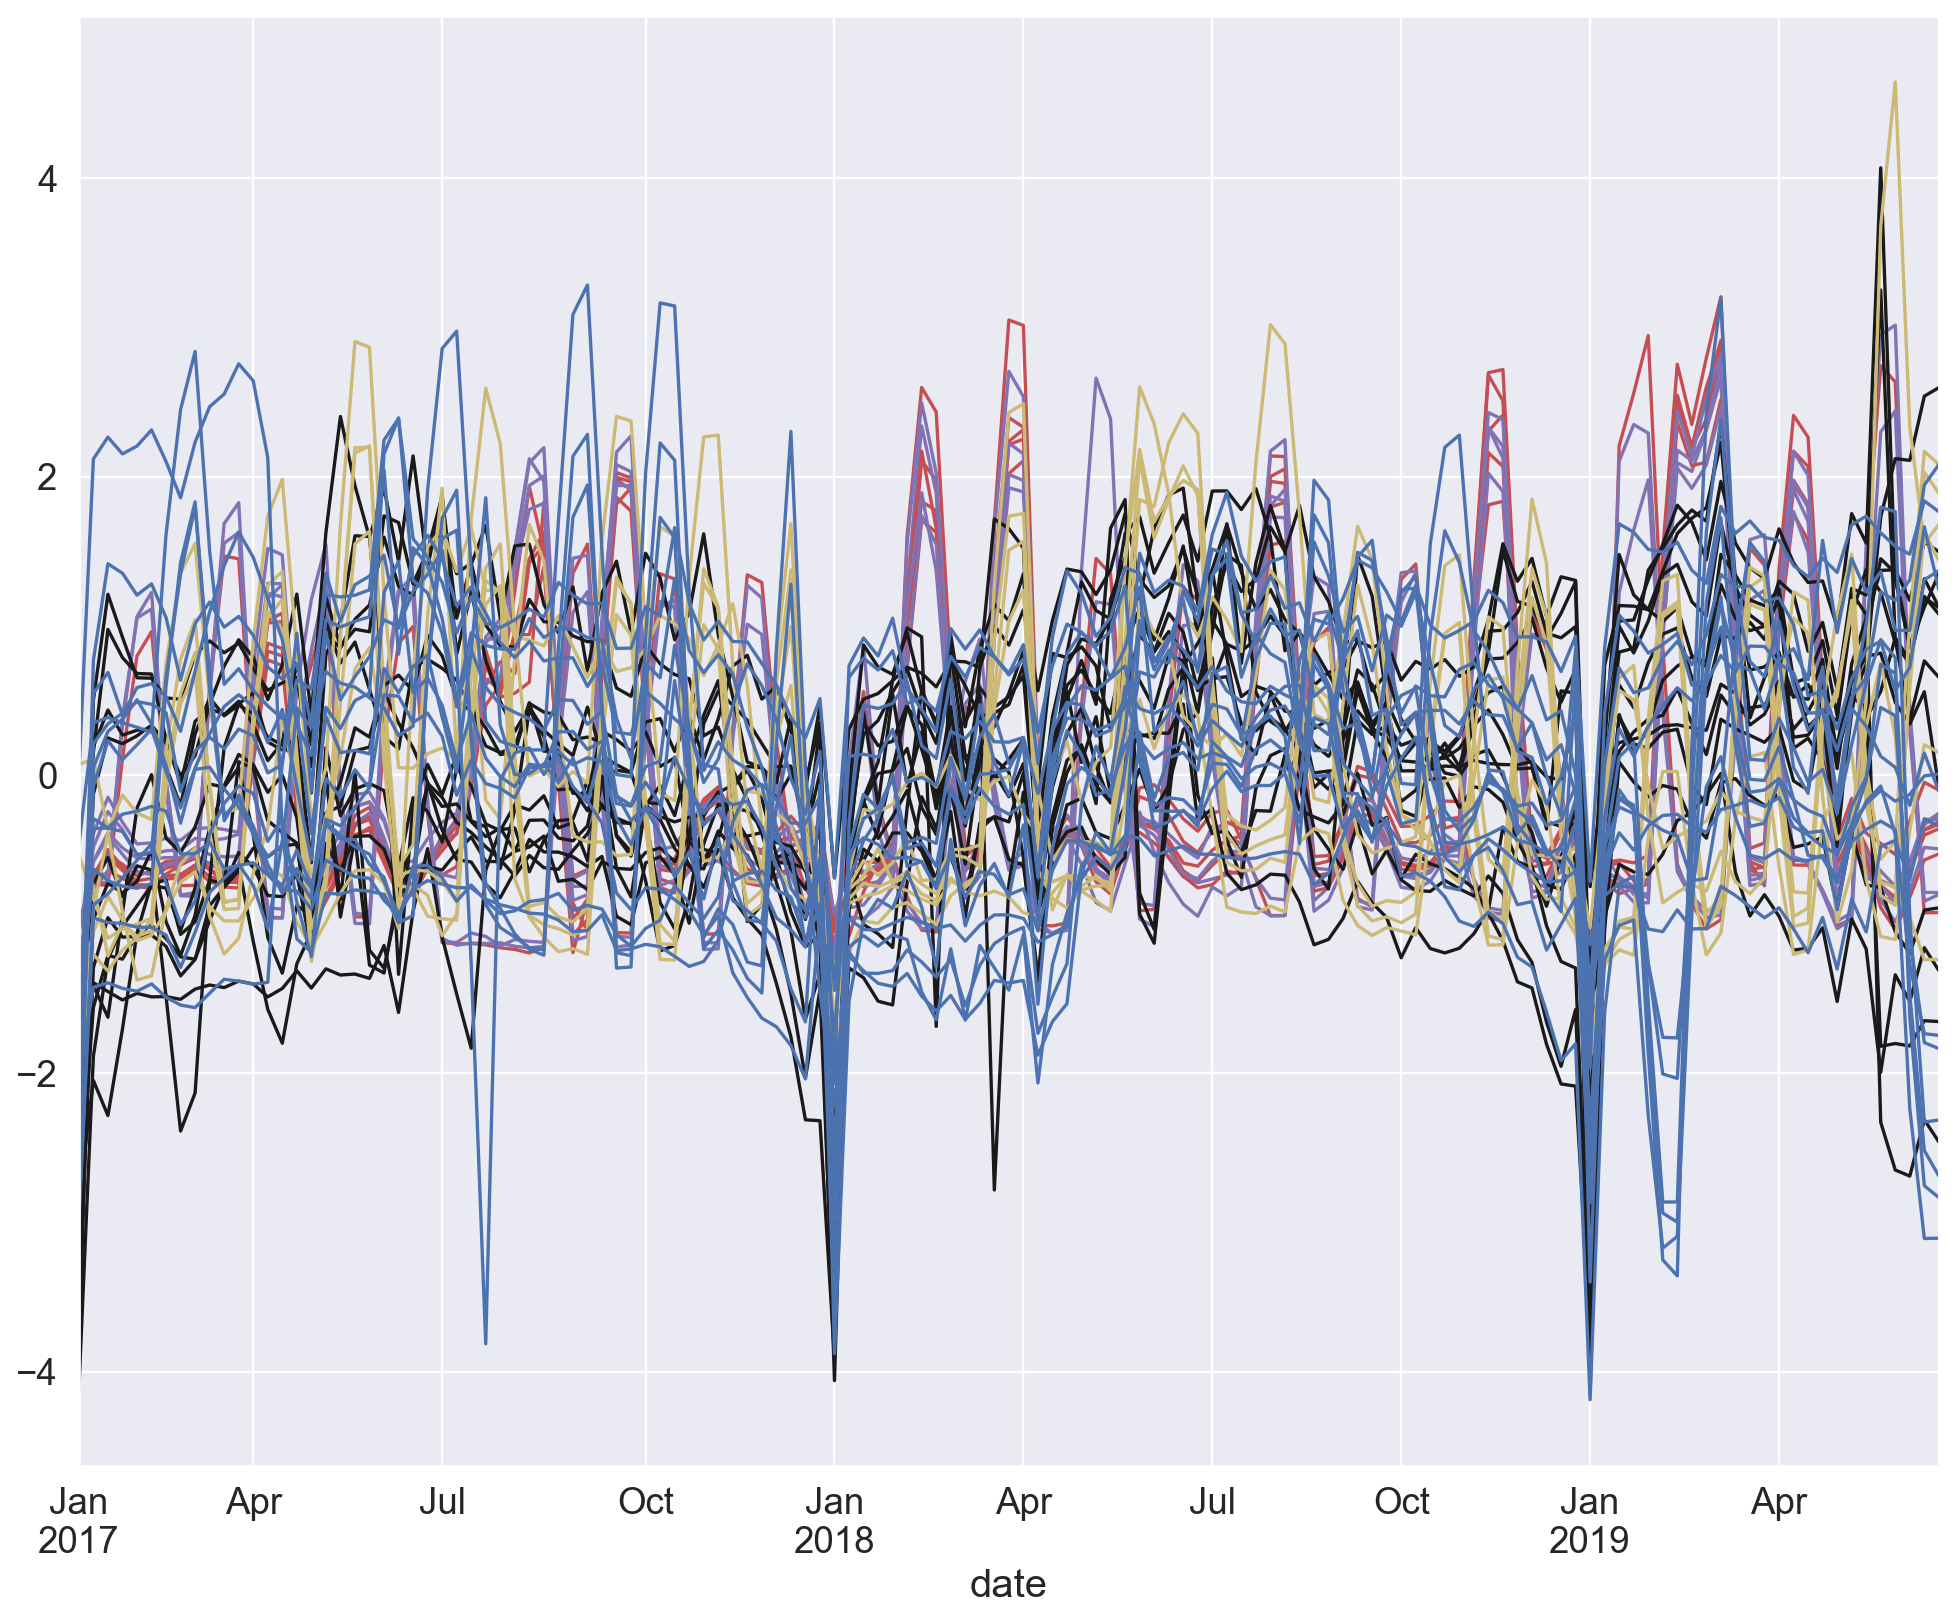

In [26]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
cls = df['2017':]
#cls.groupby('sku').nor.plot()
for skuId in cls.sku.unique():
    color = 'b'
    if dataset[dataset.sku == skuId].brand.unique()[0] == "BRAND2":
        color = 'r'
    if dataset[dataset.sku == skuId].brand.unique()[0] == "BRAND3":
        color = 'k'
    if dataset[dataset.sku == skuId].brand.unique()[0] == "BRAND4":
        color = 'm'
    if dataset[dataset.sku == skuId].brand.unique()[0] == "BRAND5":
        color = 'y'
    cls[cls.sku == skuId].nor.plot(c=color)

In [27]:
skus = pd.DataFrame({'sku': dataset.sku.unique() })
skus.reset_index()
skus.set_index('sku', inplace=True)
len(skus)

43

In [28]:
for w in range(len(skus)):
    skus['sls{}'.format(w)] = np.zeros(shape=(len(skus), 1))
skus

sls0  sls1  sls2  sls3  sls4  sls5  sls6  sls7  sls8  sls9  ...  sls33  \
sku                                                               ...          
144    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
546    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
549    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
554    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
686    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
688    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1027   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1035   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1051   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1058   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1065   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1206   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1356   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1365   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1371   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1472   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1516   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1554   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1600   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1603   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1608   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1618   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1633   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1732   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2249   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2360   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2365   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2396   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2401   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2410   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2678   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2681   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2682   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2683   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2689   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2696   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2698   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2704   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2705   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2707   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2711   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2712   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2718   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

      sls34  sls35  sls36  sls37  sls38  sls39  sls40  sls41  sls42  
sku                                                                  
144     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
546     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
549     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
554     0.0    0.0    0.0    0.0    0.0    0.0    0.0  

In [29]:
i = 0
for skuId in list(skus.index.values):
    dff = cls[cls.sku == skuId].nor
    chg = cls[cls.sku == skuId].nor.pct_change().dropna()
    
    for w in range(len(skus)):
        skus.at[skuId, 'sls{}'.format(w)] = dff[w]
    i = i + 1
skus

sls0      sls1      sls2      sls3      sls4      sls5      sls6  \
sku                                                                          
144  -0.973811 -0.730870 -0.739730  0.110182  0.798017  0.961001 -0.047186   
546  -1.239235 -0.678070 -0.500517 -0.613180 -0.732955 -0.741785 -0.664946   
549  -0.997046 -0.656881 -0.551314 -0.638551 -0.709579 -0.693370 -0.624463   
554  -1.302978 -0.718768 -0.526018 -0.637505 -0.745278 -0.761177 -0.675671   
686  -0.982790 -0.725769 -0.718204  0.382895  1.052400  1.113010 -0.107381   
688  -1.084443 -0.578961 -0.387442 -0.489060 -0.556332 -0.564208 -0.553528   
1027 -1.220437 -0.766575 -0.642160 -0.692462 -0.748540 -0.745213 -0.697250   
1035 -1.072253 -0.687125 -0.545065 -0.597659 -0.675981 -0.643543 -0.579407   
1051 -1.004723 -0.644379 -0.674535  0.330306  1.061879  1.224059 -0.027990   
1058 -1.079854 -0.582280 -0.413065 -0.531305 -0.647405 -0.669007 -0.599364   
1065 -1.126856 -0.392958 -0.149504 -0.316433 -0.462138 -0.454903 -0.423204   
1206 -1.221203 -0.484124 -0.245469 -0.367432 -0.533908 -0.531828 -0.508115   
1356 -3.899196 -0.729114 -0.552998 -0.815966 -0.609090 -0.637438 -1.484843   
1365 -2.152213 -1.410427 -1.624389 -0.926654 -0.221840  0.002348 -0.423215   
1371 -3.565576  0.191570  0.435616  0.267332  0.299997  0.310429  0.055951   
1472 -2.848356 -1.558640 -1.209907 -1.234494 -1.070884 -1.005801 -1.096555   
1516 -2.938773 -0.966096 -0.723976 -0.791471 -0.712988 -0.507362 -0.985325   
1554 -3.510132 -1.290202 -0.956414 -1.086874 -1.082484 -1.072300 -1.149207   
1600 -1.965663 -1.392848 -1.451698 -1.508382 -1.464352 -1.487494 -1.485760   
1603 -2.811194  0.502221  1.211712  0.924317  0.651915  0.649071  0.516137   
1608 -3.528510  0.152562  0.975674  0.787152  0.680716  0.677156  0.238194   
1618 -2.152482 -0.127453  0.248723  0.209873  0.262388  0.334194  0.212820   
1633 -4.123369 -1.884717 -1.234134 -1.014899 -0.877976 -0.739866 -0.758069   
1732 -2.843658 -2.048390 -2.283153 -1.702925 -1.059077 -0.725064 -0.704705   
2249 -0.559568 -0.740777 -1.214392 -0.995294 -1.081780 -1.045950 -0.070716   
2360 -1.542492 -1.050270 -0.813839 -0.972200 -1.111837 -1.074389 -0.909046   
2365  0.071365  0.105239 -0.366226 -0.135214 -0.253496 -0.299865  0.749408   
2396 -2.236742 -0.915775 -0.384523 -0.917704 -1.374284 -1.346454 -0.894007   
2401 -0.532792 -0.827157 -1.094631 -1.032961 -1.000692 -0.959639  0.164396   
2410 -1.012919 -1.202226 -1.314879 -1.173851 -1.093809 -0.968027  0.031871   
2678 -1.620235 -0.629219 -0.708500 -0.745133 -0.759076 -0.728457  0.599095   
2681 -0.469769  0.349396  0.385954  0.350750  0.320285  0.286774  1.611994   
2682 -1.563503 -0.357973 -0.355706 -0.262494 -0.242944 -0.210363 -0.241811   
2683 -1.487206 -0.292486 -0.355152 -0.378965 -0.533122 -0.519336  0.654705   
2689  0.004887  2.119152  2.265470  2.152832  2.205471  2.313872  2.101308   
2696 -2.966241 -0.871162 -0.796416 -0.688854 -0.571448 -0.462793 -0.722763   
2698 -1.995842 -1.422906 -1.393580 -1.430565 -1.449824 -1.400583 -1.489872   
2704 -2.683846  0.210667  0.343380  0.414644  0.491882  0.474386  0.417631   
2705 -2.628026  0.768446  1.416402  1.352790  1.206146  1.281476  1.055707   
2707 -1.933878  0.049421  0.292471  0.373802  0.504403  0.343863  0.064744   
2711 -1.909661  0.546419  0.687862  0.402502  0.586419  0.612398  0.526213   
2712 -2.989190 -0.958815 -0.988743 -0.995249 -1.020232 -1.021793 -1.073320   
2718 -2.530870 -0.073896  0.230633  0.102351  0.202299  0.308048  0.022259   

          sls7      sls8      sls9  ...     sls33     sls34     sls35  \
sku                                 ...                                 
144  -0.742417 -0.739870  0.580716  ...  0.265143  1.351683  1.547808   
546  -0.602707 -0.556055 -0.636832  ...  0.105041 -0.858535 -1.046935   
549  -0.596116 -0.558913 -0.633074  ... -0.039883 -1.190837 -0.833205   
554  -0.667716 -0.602906 -0.681685  ...  0.052946 -1.069260 -0.971081   
686  -0.804970 -0.788799  0.535601  ...  0.388163  1.453122  

This time we try to use **Agglomerative Hierarchical Clustering**.

In [30]:
from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(n_clusters=9)
aggc.fit(skus.reset_index(drop=True))

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=9)

In [31]:
res_km = skus
res_km['label'] = aggc.labels_
res_km.sort_values(by='label')

sls0      sls1      sls2      sls3      sls4      sls5      sls6  \
sku                                                                          
1516 -2.938773 -0.966096 -0.723976 -0.791471 -0.712988 -0.507362 -0.985325   
2360 -1.542492 -1.050270 -0.813839 -0.972200 -1.111837 -1.074389 -0.909046   
2698 -1.995842 -1.422906 -1.393580 -1.430565 -1.449824 -1.400583 -1.489872   
2696 -2.966241 -0.871162 -0.796416 -0.688854 -0.571448 -0.462793 -0.722763   
2712 -2.989190 -0.958815 -0.988743 -0.995249 -1.020232 -1.021793 -1.073320   
1356 -3.899196 -0.729114 -0.552998 -0.815966 -0.609090 -0.637438 -1.484843   
2396 -2.236742 -0.915775 -0.384523 -0.917704 -1.374284 -1.346454 -0.894007   
2678 -1.620235 -0.629219 -0.708500 -0.745133 -0.759076 -0.728457  0.599095   
2683 -1.487206 -0.292486 -0.355152 -0.378965 -0.533122 -0.519336  0.654705   
2681 -0.469769  0.349396  0.385954  0.350750  0.320285  0.286774  1.611994   
2249 -0.559568 -0.740777 -1.214392 -0.995294 -1.081780 -1.045950 -0.070716   
2365  0.071365  0.105239 -0.366226 -0.135214 -0.253496 -0.299865  0.749408   
2410 -1.012919 -1.202226 -1.314879 -1.173851 -1.093809 -0.968027  0.031871   
2401 -0.532792 -0.827157 -1.094631 -1.032961 -1.000692 -0.959639  0.164396   
1618 -2.152482 -0.127453  0.248723  0.209873  0.262388  0.334194  0.212820   
2705 -2.628026  0.768446  1.416402  1.352790  1.206146  1.281476  1.055707   
2711 -1.909661  0.546419  0.687862  0.402502  0.586419  0.612398  0.526213   
1603 -2.811194  0.502221  1.211712  0.924317  0.651915  0.649071  0.516137   
2707 -1.933878  0.049421  0.292471  0.373802  0.504403  0.343863  0.064744   
2704 -2.683846  0.210667  0.343380  0.414644  0.491882  0.474386  0.417631   
2718 -2.530870 -0.073896  0.230633  0.102351  0.202299  0.308048  0.022259   
1371 -3.565576  0.191570  0.435616  0.267332  0.299997  0.310429  0.055951   
1608 -3.528510  0.152562  0.975674  0.787152  0.680716  0.677156  0.238194   
1058 -1.079854 -0.582280 -0.413065 -0.531305 -0.647405 -0.669007 -0.599364   
546  -1.239235 -0.678070 -0.500517 -0.613180 -0.732955 -0.741785 -0.664946   
688  -1.084443 -0.578961 -0.387442 -0.489060 -0.556332 -0.564208 -0.553528   
1027 -1.220437 -0.766575 -0.642160 -0.692462 -0.748540 -0.745213 -0.697250   
1035 -1.072253 -0.687125 -0.545065 -0.597659 -0.675981 -0.643543 -0.579407   
554  -1.302978 -0.718768 -0.526018 -0.637505 -0.745278 -0.761177 -0.675671   
549  -0.997046 -0.656881 -0.551314 -0.638551 -0.709579 -0.693370 -0.624463   
1206 -1.221203 -0.484124 -0.245469 -0.367432 -0.533908 -0.531828 -0.508115   
1065 -1.126856 -0.392958 -0.149504 -0.316433 -0.462138 -0.454903 -0.423204   
1365 -2.152213 -1.410427 -1.624389 -0.926654 -0.221840  0.002348 -0.423215   
2682 -1.563503 -0.357973 -0.355706 -0.262494 -0.242944 -0.210363 -0.241811   
1472 -2.848356 -1.558640 -1.209907 -1.234494 -1.070884 -1.005801 -1.096555   
1554 -3.510132 -1.290202 -0.956414 -1.086874 -1.082484 -1.072300 -1.149207   
1732 -2.843658 -2.048390 -2.283153 -1.702925 -1.059077 -0.725064 -0.704705   
1633 -4.123369 -1.884717 -1.234134 -1.014899 -0.877976 -0.739866 -0.758069   
1600 -1.965663 -1.392848 -1.451698 -1.508382 -1.464352 -1.487494 -1.485760   
2689  0.004887  2.119152  2.265470  2.152832  2.205471  2.313872  2.101308   
1051 -1.004723 -0.644379 -0.674535  0.330306  1.061879  1.224059 -0.027990   
686  -0.982790 -0.725769 -0.718204  0.382895  1.052400  1.113010 -0.107381   
144  -0.973811 -0.730870 -0.739730  0.110182  0.798017  0.961001 -0.047186   

          sls7      sls8      sls9  ...     sls34     sls35     sls36  \
sku                                 ...                                 
1516 -1.210572 -0.940197 -0.378649  ... -0.122401 -0.125541  0.294737   
2360 -0.719266 -0.648495 -0.884927  ...  0.858319  0.652354  0.890055   
2698 -1.542395 -1.559684 -1.462735  ...  1.205864  1.146994  1.152028   
2696 -1.002423 -0.844545 -0.393516  ... -0.078124 -0.186779  0.189139   
2712 -1.290098 -1.054062 -0.785237  ...  0.291627  0.171657  

Label 8: 3.0
Label 5: 9.0
Label 0: 7.0
Label 6: 7.0
Label 4: 5.0
Label 3: 4.0
Label 2: 4.0
Label 1: 3.0
Label 7: 1.0


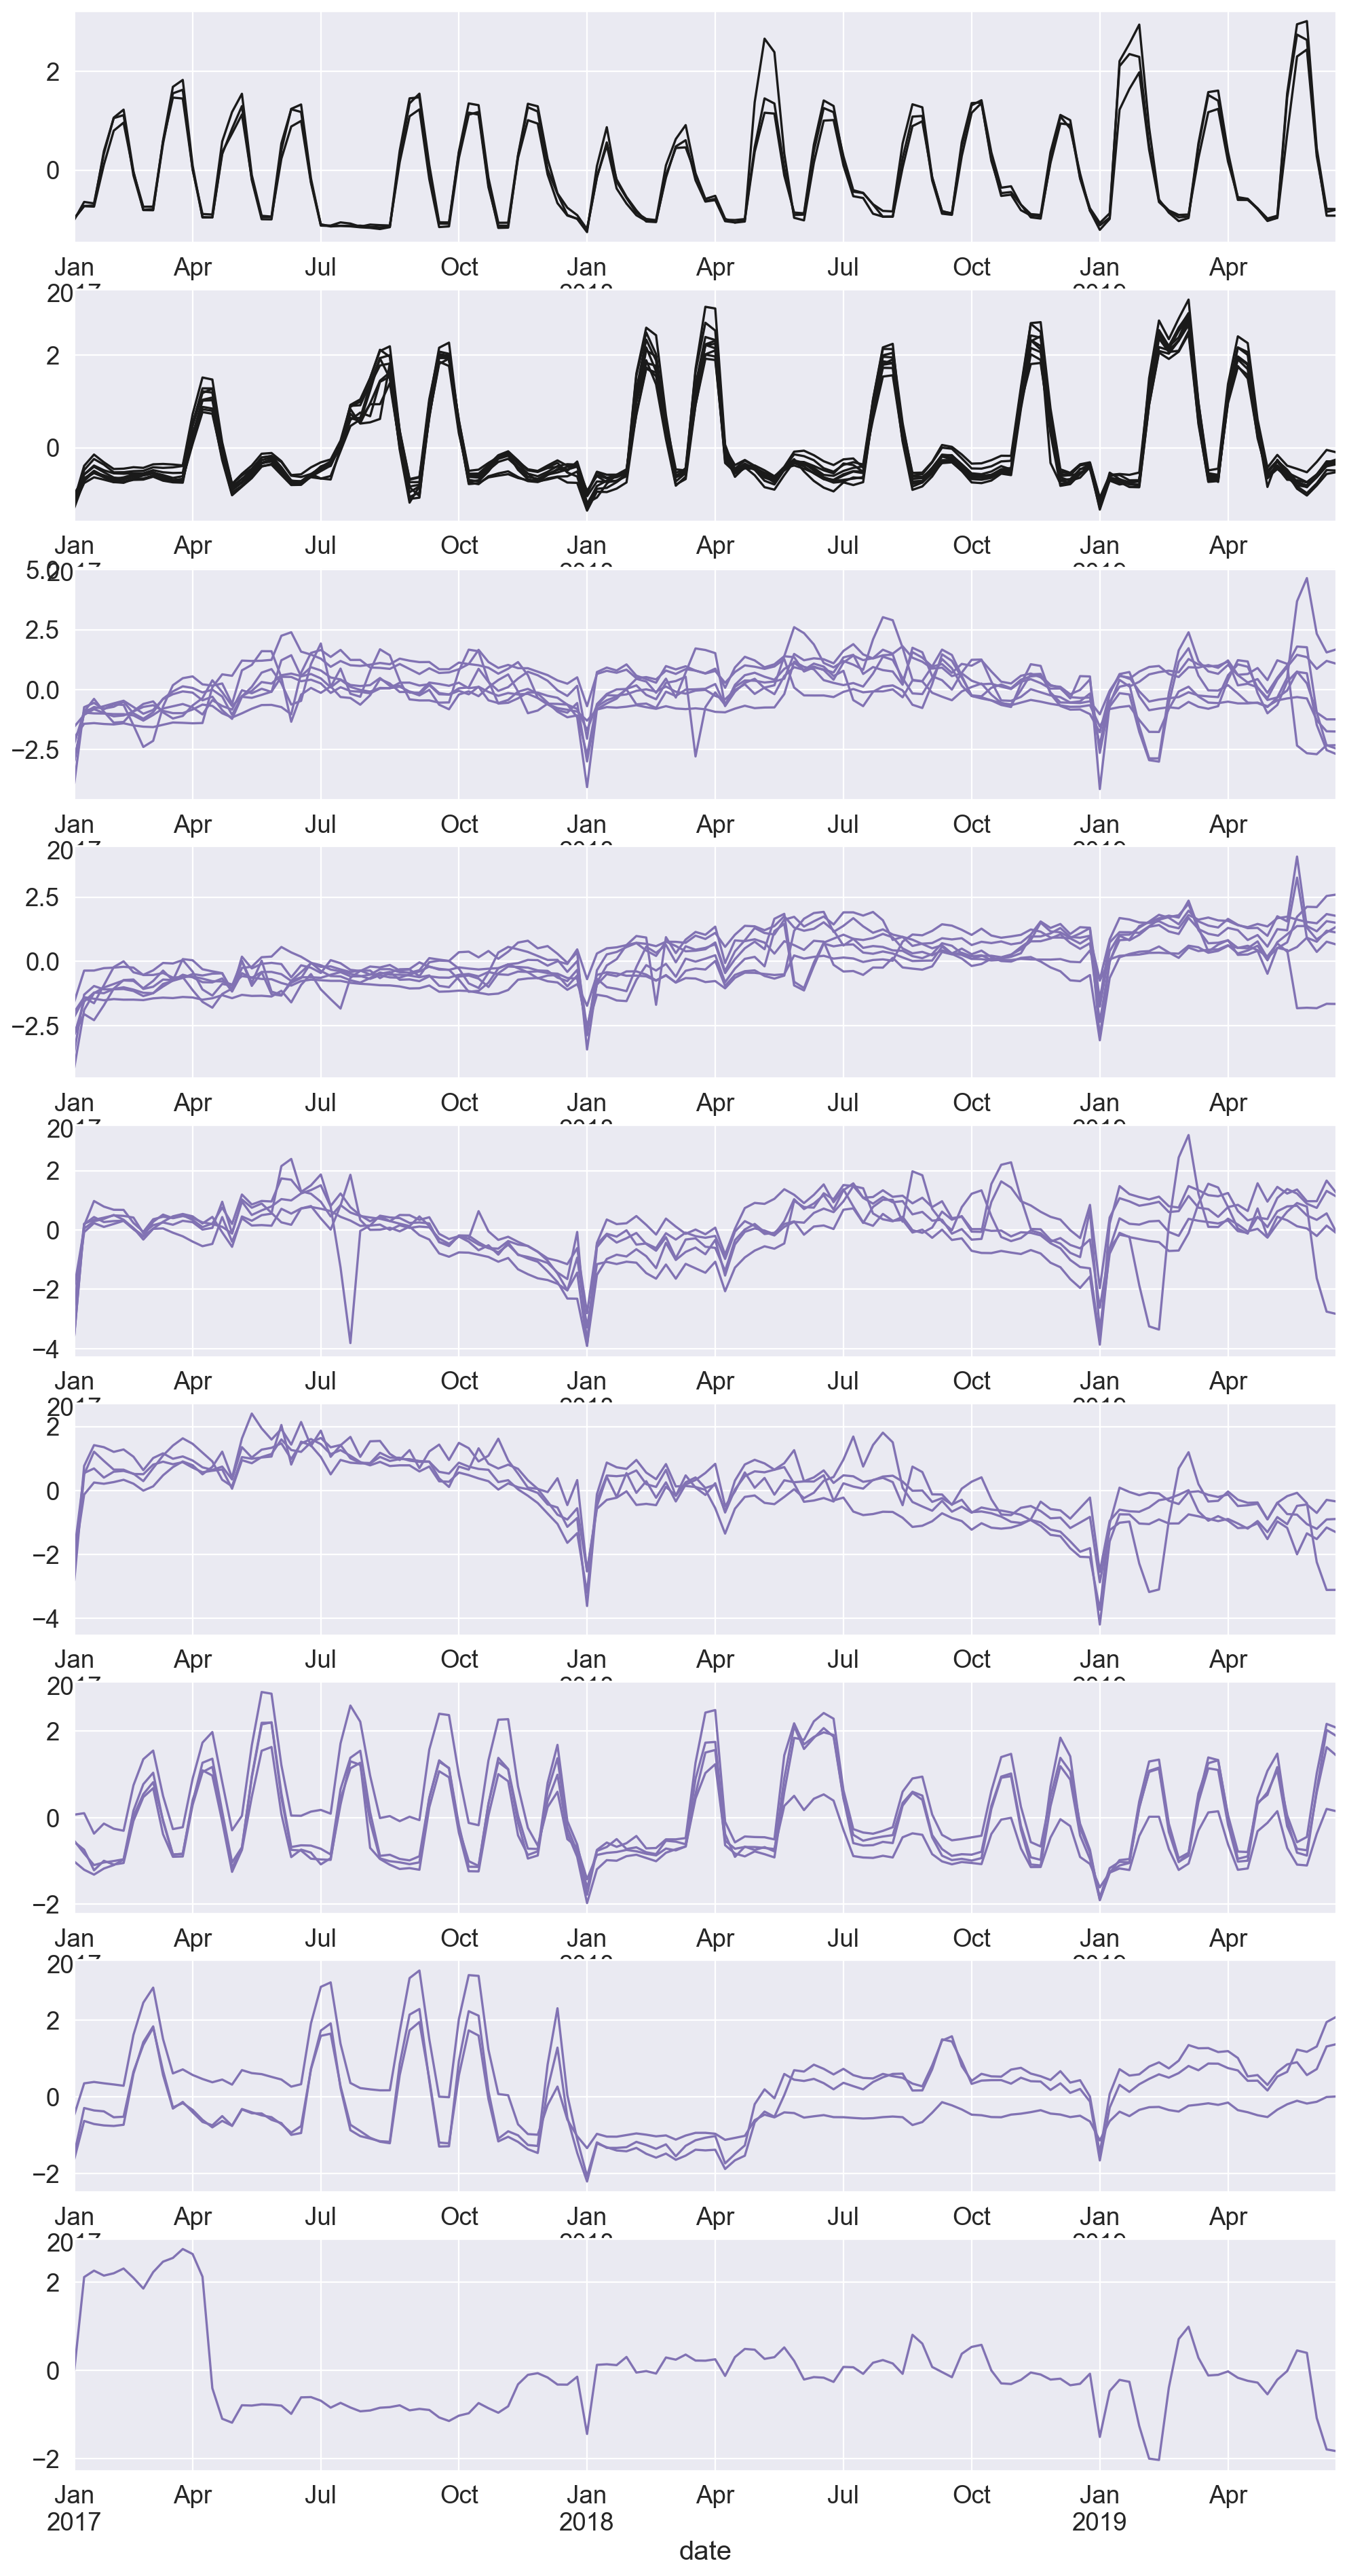

In [32]:
figure(num=None, figsize=(15, 30), dpi=80, facecolor='w', edgecolor='k')
i = 1

for lb in res_km.label.unique():
    plt.subplot(len(res_km.label.unique()), 1, i)
    i = i + 1
    bt = df[df.sku.isin(res_km[res_km.label == lb].index)]
    print("Label {}: {}".format(lb, len(bt) / 133))
    color='m'
    for skuId in bt.sku.unique():
        if bt[bt.sku == skuId].scope.unique()[0] == 1:
            color='k'
        bt[bt.sku == skuId]['2017':].nor.plot(c=color)

We now see more clearly that some products have indeed a similar trend in their sales. Furthermore, **the products in the scope are clearly divided in two clusters (label=5 and label=8), we can use this information for the prediction, since it is probable that they will have a similar amount of sales also in the future.**

sku
546     AxesSubplot(0.125,0.125;0.775x0.755)
549     AxesSubplot(0.125,0.125;0.775x0.755)
554     AxesSubplot(0.125,0.125;0.775x0.755)
688     AxesSubplot(0.125,0.125;0.775x0.755)
1027    AxesSubplot(0.125,0.125;0.775x0.755)
1035    AxesSubplot(0.125,0.125;0.775x0.755)
1058    AxesSubplot(0.125,0.125;0.775x0.755)
1065    AxesSubplot(0.125,0.125;0.775x0.755)
1206    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sales, dtype: object

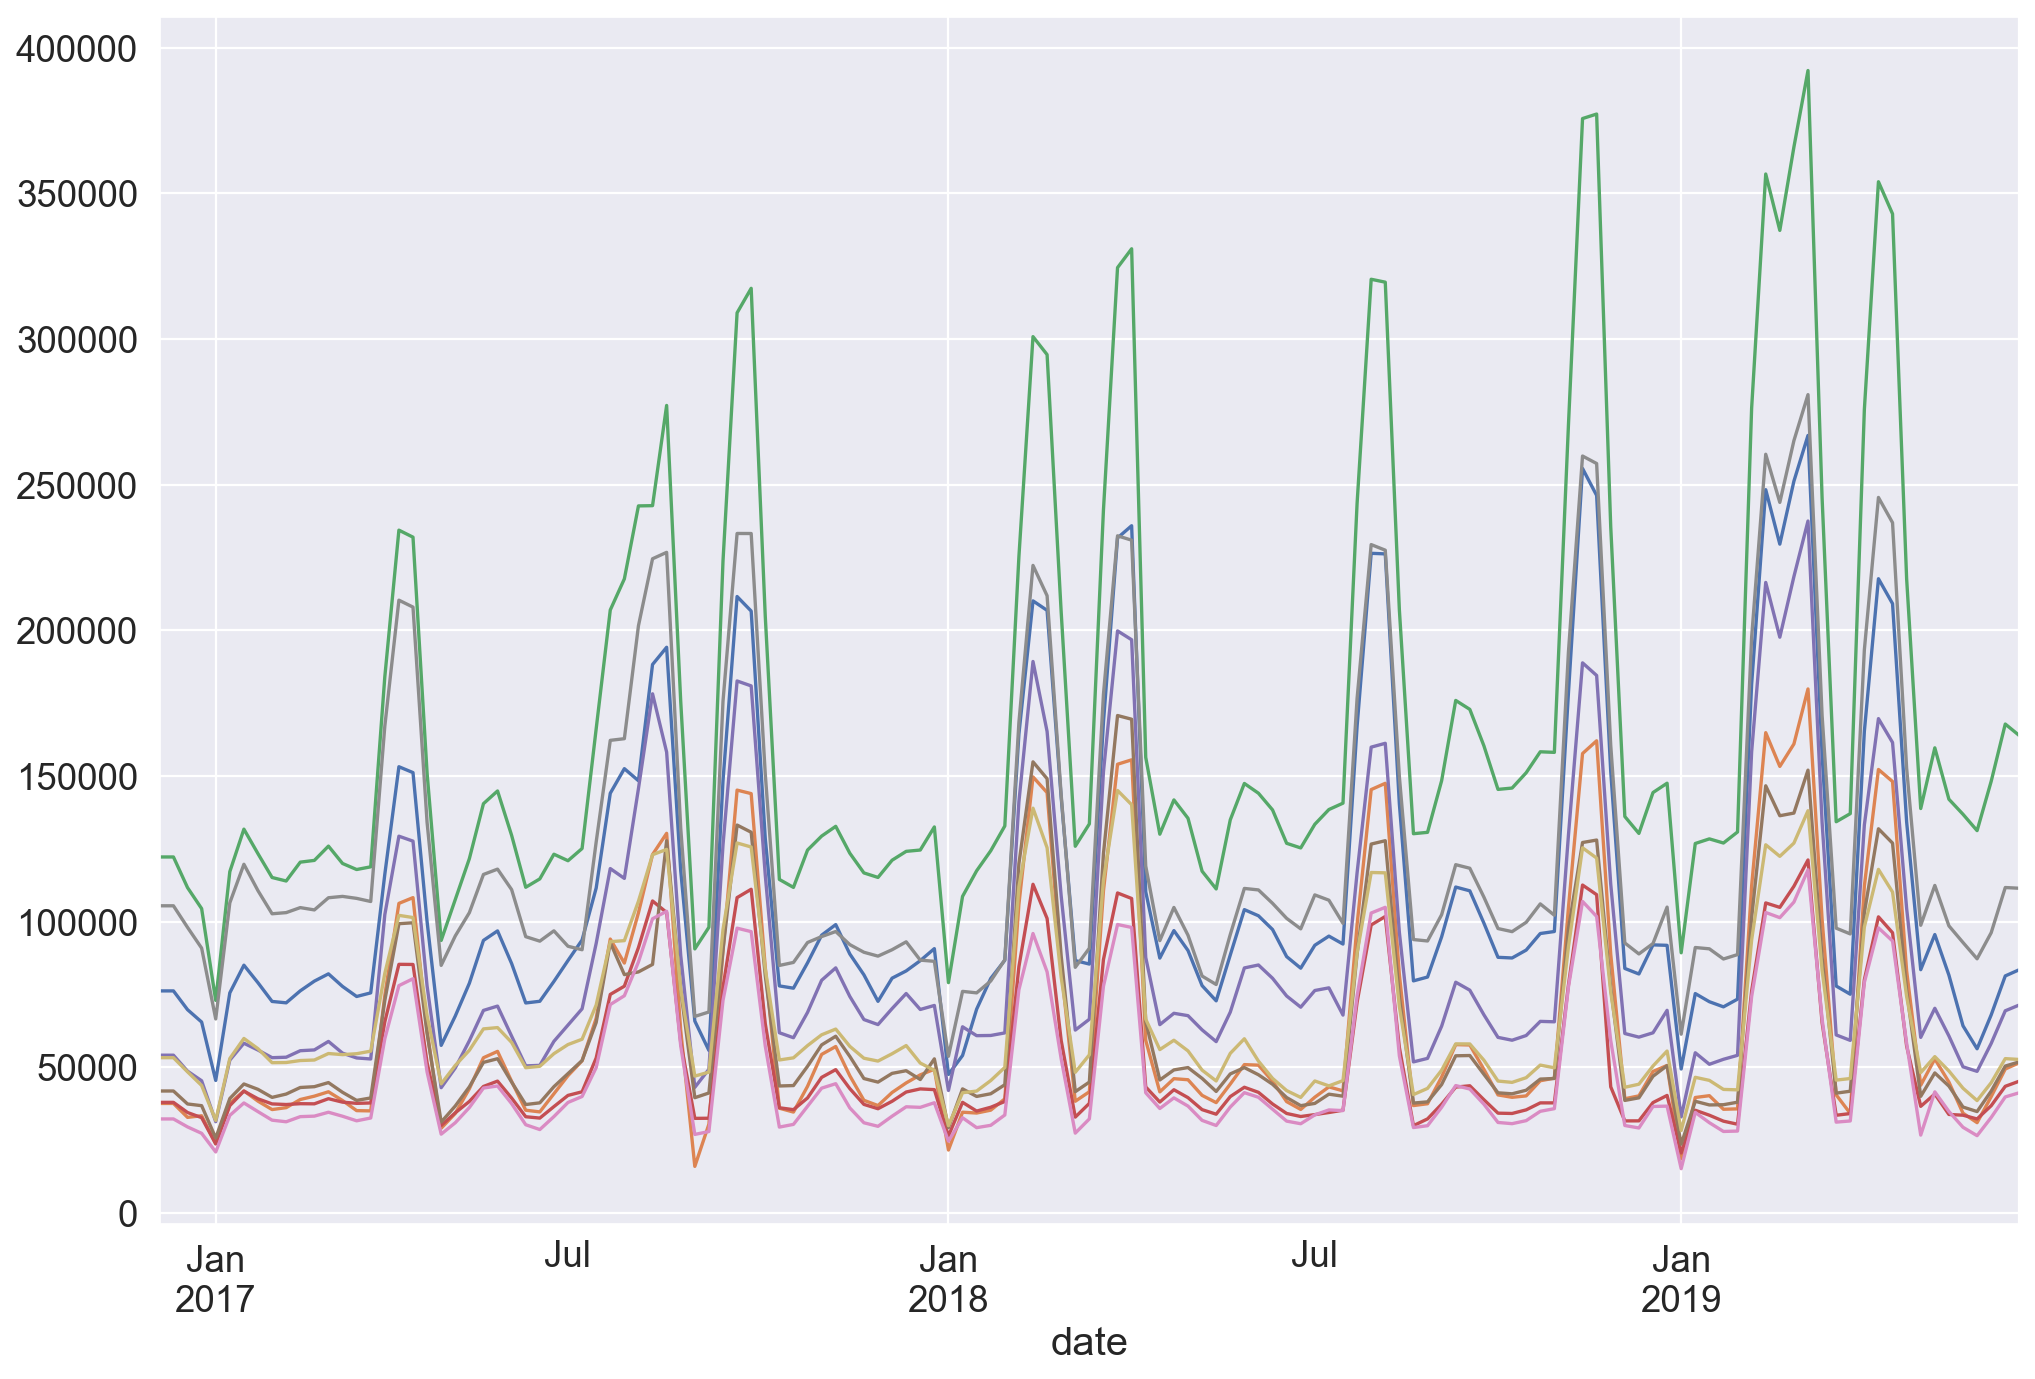

In [33]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
dataset[dataset.sku.isin(res_km[res_km.label == 5].index)].groupby('sku').sales.plot()

sku
144     AxesSubplot(0.125,0.125;0.775x0.755)
686     AxesSubplot(0.125,0.125;0.775x0.755)
1051    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sales, dtype: object

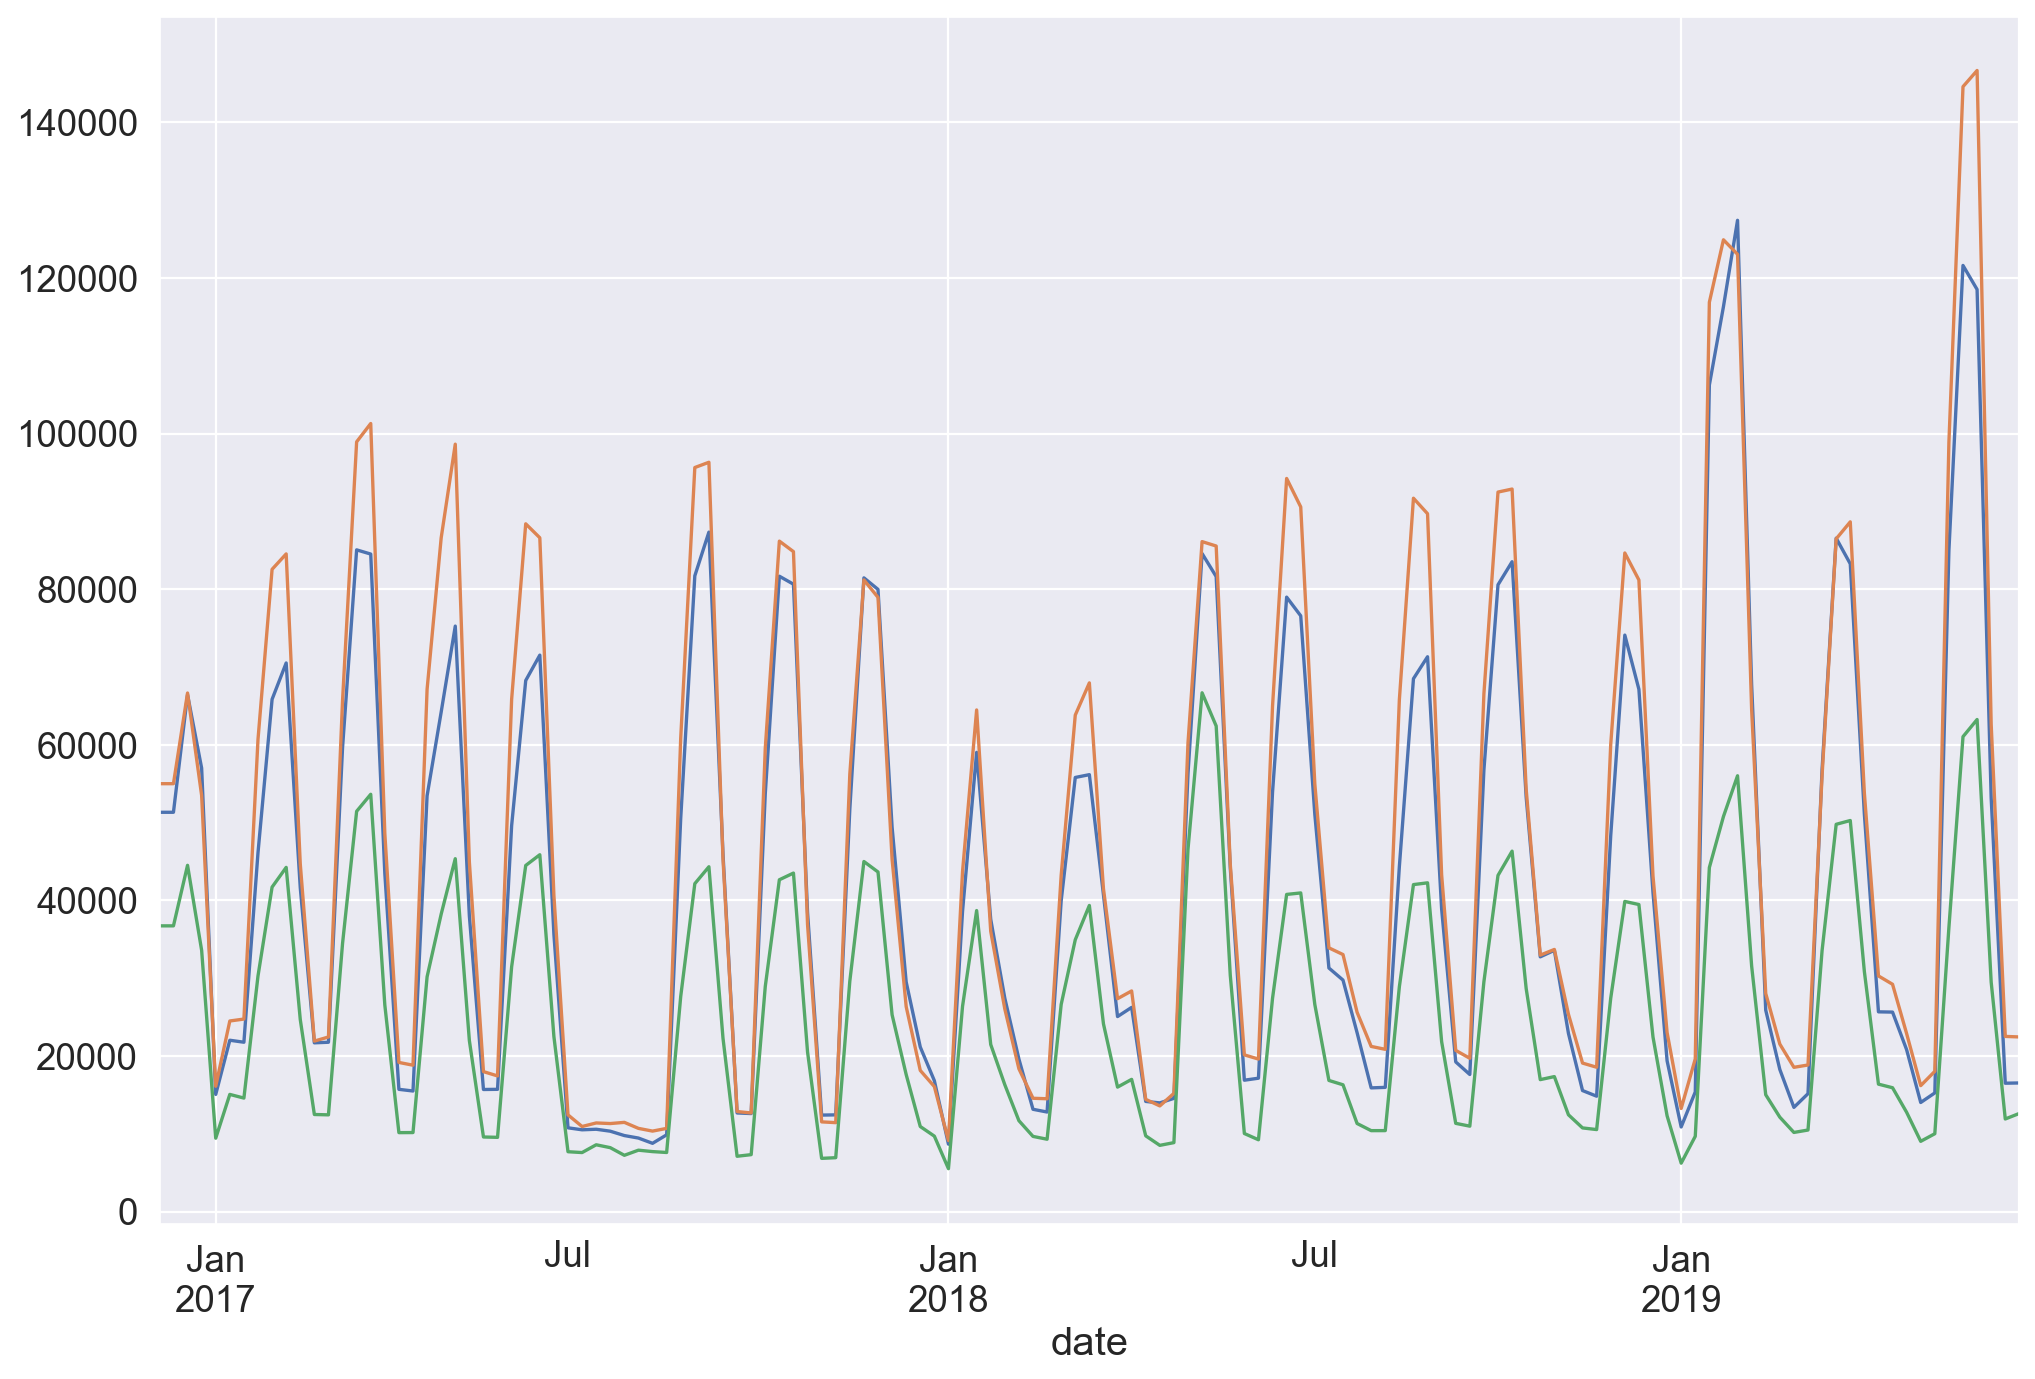

In [34]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
dataset[dataset.sku.isin(res_km[res_km.label == 8].index)].groupby('sku').sales.plot()

In [35]:
cluster = []
for index, row in dataset.iterrows():
    if (res_km[res_km.index == row.sku].label.max() == 8):
        cluster.append(1)
    elif (res_km[res_km.index == row.sku].label.max() == 5):
        cluster.append(2)
    else:
        cluster.append(0)
dataset['cluster'] = cluster
dataset

sku    pack    size   brand  price  exposed       promo    sales  \
date                                                                            
2016-12-10   144   MULTI  114.23  BRAND2   2.18     45.0  100.000000  51320.0   
2016-12-17   144   MULTI  114.23  BRAND2   2.00     45.0  100.000000  51320.0   
2016-12-24   144   MULTI  114.23  BRAND2   2.05     17.0  100.000000  66431.0   
2016-12-31   144   MULTI  114.23  BRAND2   3.00      2.0  100.000000  57001.0   
2017-01-07   144   MULTI  114.23  BRAND2   2.99      2.0   28.534193  15052.0   
...          ...     ...     ...     ...    ...      ...         ...      ...   
2019-05-25  2718  SINGLE  395.41  BRAND1   1.11      0.0   26.050480  33875.0   
2019-06-01  2718  SINGLE  395.41  BRAND1   1.30      1.0   43.099496  33328.0   
2019-06-08  2718  SINGLE  395.41  BRAND1   1.55      0.0    0.000000  22512.0   
2019-06-15  2718  SINGLE  395.41  BRAND1   1.55      0.0    0.000000  17461.0   
2019-06-22  2718  SINGLE  395.41  BRAND1   1.12      0.0    0.080094  17105.0   

            scope   target       nor  cluster  
date                                           
2016-12-10      1  51320.0  0.291411        1  
2016-12-17      1  66431.0  0.291411        1  
2016-12-24      1  57001.0  0.818564        1  
2016-12-31      1  15052.0  0.489595        1  
2017-01-07      1  22016.0 -0.973811        1  
...           ...      ...       ...      ...  
2019-05-25      0  33328.0  0.908180        0  
2019-06-01      0  22512.0  0.786146        0  
2019-06-08      0  17461.0 -1.626878        0  
2019-06-15      0  17105.0 -2.753745        0  
2019-06-22      0  35144.0 -2.833167        0  

[5719 rows x 12 columns]

In [36]:
len(dataset[dataset.cluster == 1]) / 133

3.0

In [37]:
len(dataset[dataset.cluster == 2]) / 133

9.0

In [38]:
dataset.to_csv('./data/step2.csv', index=True)